<a href="https://colab.research.google.com/github/BLayus/Acadia-Churn-Case/blob/main/Acadia_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Dataset

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# Data viz
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# ML libraries

from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix, log_loss,
                             precision_score, accuracy_score, recall_score, f1_score, classification_report,
                             make_scorer, precision_recall_curve, precision_recall_fscore_support)

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier)

from sklearn.inspection import permutation_importance

from imblearn.ensemble import BalancedRandomForestClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

! pip install scikit-optimize
from skopt import BayesSearchCV

from yellowbrick.features import PCA

from yellowbrick.cluster import KElbowVisualizer

# SHAP analysis
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.8 MB/s eta 0:00:00


In [ ]:
# Applying a plot style to the charts

#plt.style.use('seaborn-v0_8')

sns.set_style('darkgrid', {'grid.color': '.8',
                           'grid.linestyle': '-',
                           'text.color': '.2',
                           'xtick.color': 'dimgray',
                           'ytick.color': 'dimgray',
                           'axes.labelcolor': 'dimgray'})

# Defining a color pallete

colors = ['midnightblue', 'grey', 'cornflowerblue', 'silver', 'lightsteelblue', 'whitesmoke']
sns.set_palette(sns.color_palette(colors))

In [ ]:
# Import dataset from github repository

url = 'https://github.com/BLayus/Acadia-Churn-Case/blob/main/Dataset/Data_DS-Assignment.csv?raw=true'

df = pd.read_csv(url)


In [ ]:
df.head()

,Customer_ID,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,...,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE,SECONDVISITFLAG
0,138721796,17,0.0,0.0,26.28,0.0,0.0,0.0,6.99,0.0,...,22.9,0.0,0.00,0.0,0.0,0.0,0.0,6,4.468420,N
1,138530825,2,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,10.0,0.0,1,4.468420,N
2,138722449,3,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1,4.468420,N
3,138729131,3,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,6.29,0.0,0.0,0.0,0.0,1,1.531161,N
4,138725186,1,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1,1.531161,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239746 entries, 0 to 239745
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               239746 non-null  int64  
 1   TOTALQUANTITY             239746 non-null  int64  
 2   Main_Plates_Sale          239746 non-null  float64
 3   Salads_&_Powerbowls_Sale  239746 non-null  float64
 4   Salads_Sale               239746 non-null  float64
 5   Beverages_Sale            239746 non-null  float64
 6   Mixed_Drinks_Sale         239746 non-null  float64
 7   Pastas_Sale               239746 non-null  float64
 8   Soups_Sale                239746 non-null  float64
 9   Beer_Sale                 239746 non-null  float64
 10  Spirits_Sale              239746 non-null  float64
 11  Wine_Sale                 239746 non-null  float64
 12  Mains_Sale                239746 non-null  float64
 13  Pizza_Sale                239746 non-null  f

DISTANCE_TO_CLOSESTSTORE    1185
Customer_ID                    0
TOTALQUANTITY                  0
GUEST_COUNT                    0
%_Alcohol_of_Bill              0
TOTAL_DISCOUNT                 0
Sandwiches_Sale                0
Kids_Sale                      0
Desserts_Sale                  0
Combo_Boxes_Sale               0
Lunch_Duos_Sale                0
Small_Plates_Sale              0
Appetizers_Sale                0
Specialty_Sale                 0
NABs_Sale                      0
Pizza_Sale                     0
Mains_Sale                     0
Wine_Sale                      0
Spirits_Sale                   0
Beer_Sale                      0
Soups_Sale                     0
Pastas_Sale                    0
Mixed_Drinks_Sale              0
Beverages_Sale                 0
Salads_Sale                    0
Salads_&_Powerbowls_Sale       0
Main_Plates_Sale               0
SECONDVISITFLAG                0
dtype: int64

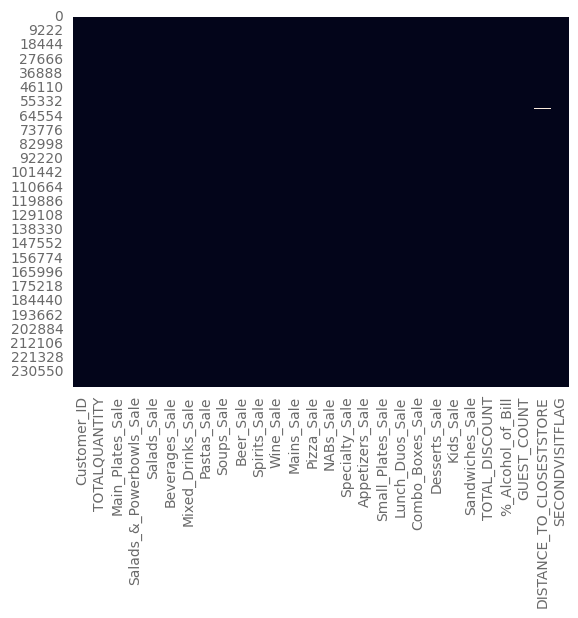

In [ ]:
# Display null values with a heatmap figure and show null quantity in ascending order

sns.heatmap(df.isnull(), cbar=False)

display(df.isnull().sum().sort_values(ascending= False))

In [ ]:
# Investigating null values in distance to closest store

df['DISTANCE_TO_CLOSESTSTORE'].isna().sum()

1185

In [ ]:
# Assign median to null values, it means that this data entries must belongs to
# stores that has no other close stores

median_dist =  df['DISTANCE_TO_CLOSESTSTORE'].median()

df['DISTANCE_TO_CLOSESTSTORE'] = df['DISTANCE_TO_CLOSESTSTORE'].fillna(median_dist)

In [ ]:
# Check if there is any reamaining null values

df['DISTANCE_TO_CLOSESTSTORE'].isna().sum()

0

## Exploratory Data Analysis

In [ ]:
# Describe main statistical information

df.describe()

,Customer_ID,TOTALQUANTITY,Main_Plates_Sale,Salads_&_Powerbowls_Sale,Salads_Sale,Beverages_Sale,Mixed_Drinks_Sale,Pastas_Sale,Soups_Sale,Beer_Sale,...,Small_Plates_Sale,Lunch_Duos_Sale,Combo_Boxes_Sale,Desserts_Sale,Kids_Sale,Sandwiches_Sale,TOTAL_DISCOUNT,%_Alcohol_of_Bill,GUEST_COUNT,DISTANCE_TO_CLOSESTSTORE
count,2.397460e+05,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,...,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000,239746.000000
mean,1.471446e+08,4.962035,2.668773,0.355731,5.882149,0.082555,1.848684,5.902421,0.532838,0.444401,...,0.831473,2.198858,0.474971,0.955284,0.042451,0.519163,4.171373,5.370109,1.585023,20.483700
std,8.910179e+06,4.395055,9.120996,6.618377,12.850325,1.481635,6.509682,15.213864,2.520602,2.515728,...,2.892918,7.862741,14.498232,4.110883,1.964961,8.420815,8.196152,14.831186,1.449732,50.585094
min,1.367098e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.394777e+08,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.230281
50%,1.437634e+08,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.569343
75%,1.536307e+08,6.000000,0.000000,0.000000,12.590000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,2.000000,12.170493
max,1.680222e+08,389.000000,335.880000,840.000000,2128.500000,253.000000,251.390000,1998.210000,170.810000,190.120000,...,349.500000,688.240000,2250.000000,360.000000,264.440000,1500.000000,550.000000,100.000000,235.000000,285.789635


In [ ]:
# Is customer ID a unique value or there are repeated customer visits identified with this ID?

df.Customer_ID.nunique()

# Id is not a a customer identification, it's a data entry ID

239746

In [ ]:
# Is there a customer id recency?

customer_recency = df.groupby(['Customer_ID']).size().reset_index(name='Quantity').sort_values('Quantity', ascending= False)

display(customer_recency)

# As seen, Customer ID is a unique  Id , it can not be used to analyse recency

,Customer_ID,Quantity
0,136709751,1
159834,151608250,1
159822,151608012,1
159823,151608051,1
159824,151608067,1
...,...,...
79920,140501663,1
79921,140501738,1
79922,140501741,1
79923,140501748,1


In [ ]:
# Investigating how many customers has made more than one visit at store

df['SECONDVISITFLAG'].value_counts()

SECONDVISITFLAG
N    214745
Y     25001
Name: count, dtype: int64

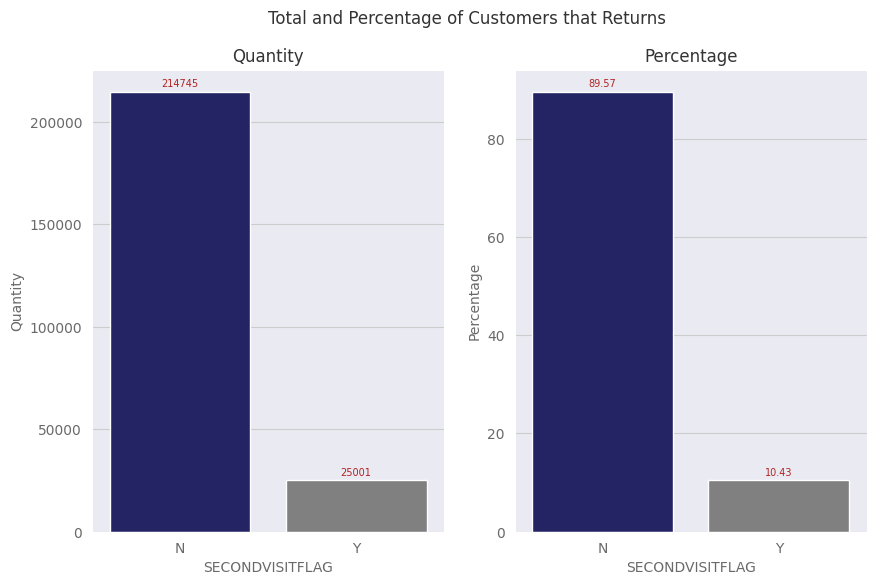

In [ ]:
# What is the percentage of customers that returns to the restaurant?

grouped = df.groupby(['SECONDVISITFLAG']).size().reset_index(name='Quantity')
grouped['Percentage'] = round(grouped['Quantity'] / grouped['Quantity'].sum() * 100, 2)

# Plot a chart with quantity and percentage of total expenses

fig, axes = plt.subplots(1,2 ,figsize=(10,6))
fig.suptitle('Total and Percentage of Customers that Returns')

ax1 = sns.barplot(x= 'SECONDVISITFLAG', y= 'Quantity', data= grouped, ax=axes[0], palette= colors)
ax2 = sns.barplot(x= 'SECONDVISITFLAG', y= 'Percentage', data= grouped, ax= axes[1],  palette= colors)
axes[0].set_title('Quantity')
axes[1].set_title('Percentage')

ax1.bar_label(ax1.containers[0], fontsize= 7, color='firebrick', padding= 2)
ax1.bar_label(ax1.containers[1], fontsize= 7, color='firebrick', padding= 2)
ax2.bar_label(ax2.containers[0], fontsize= 7, color='firebrick', padding= 2)
ax2.bar_label(ax2.containers[1], fontsize= 7, color='firebrick', padding= 2)

plt.show()


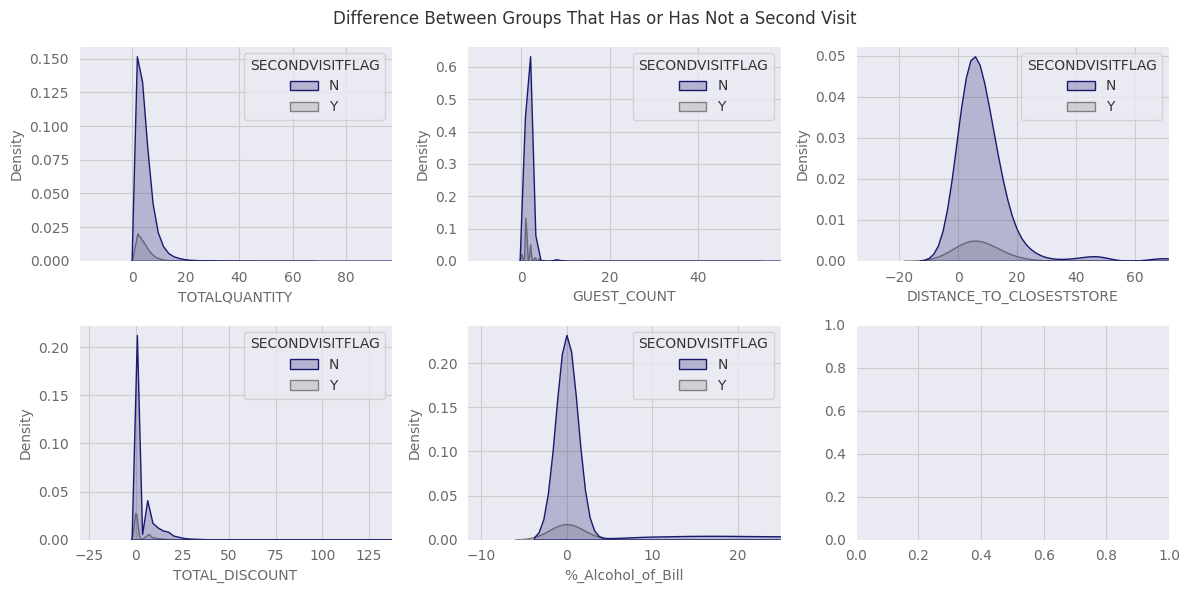

In [ ]:
# Plot charts that can demonstrate the differences between groups that has and has not returned to the store

feat_num= ['TOTALQUANTITY', 'GUEST_COUNT', 'DISTANCE_TO_CLOSESTSTORE', 'TOTAL_DISCOUNT', '%_Alcohol_of_Bill']

n = len(feat_num)

fig, axes = plt.subplots(2, (n+1)//2, figsize=(12,6))
axes= axes.flatten()

for i, col in enumerate(feat_num):
  if i < n:
    ax= axes[i]

    sns.kdeplot(data= df, x= col, hue= 'SECONDVISITFLAG', fill= True, ax= ax)

    # Set the x-axis limit
    max_limit= df[col].max()/4
    ax.set_xlim(right= max_limit)

    ax.set_xlabel(col)

  else:
    ax.axis('off')  # turn off the axis for empty plots

plt.suptitle('Difference Between Groups That Has or Has Not a Second Visit')
fig.tight_layout()
plt.show()



####From the above charts it can be deduced that:

  * Distance to closest store is a possible factor that brings customers back to stores

  * Clients which comes back to stores comes with less guest counts

  * Alcohol consumption it's not directly related to customers return, on the contrary, the lower the expenditure on alcohol, the more likely the customer will return


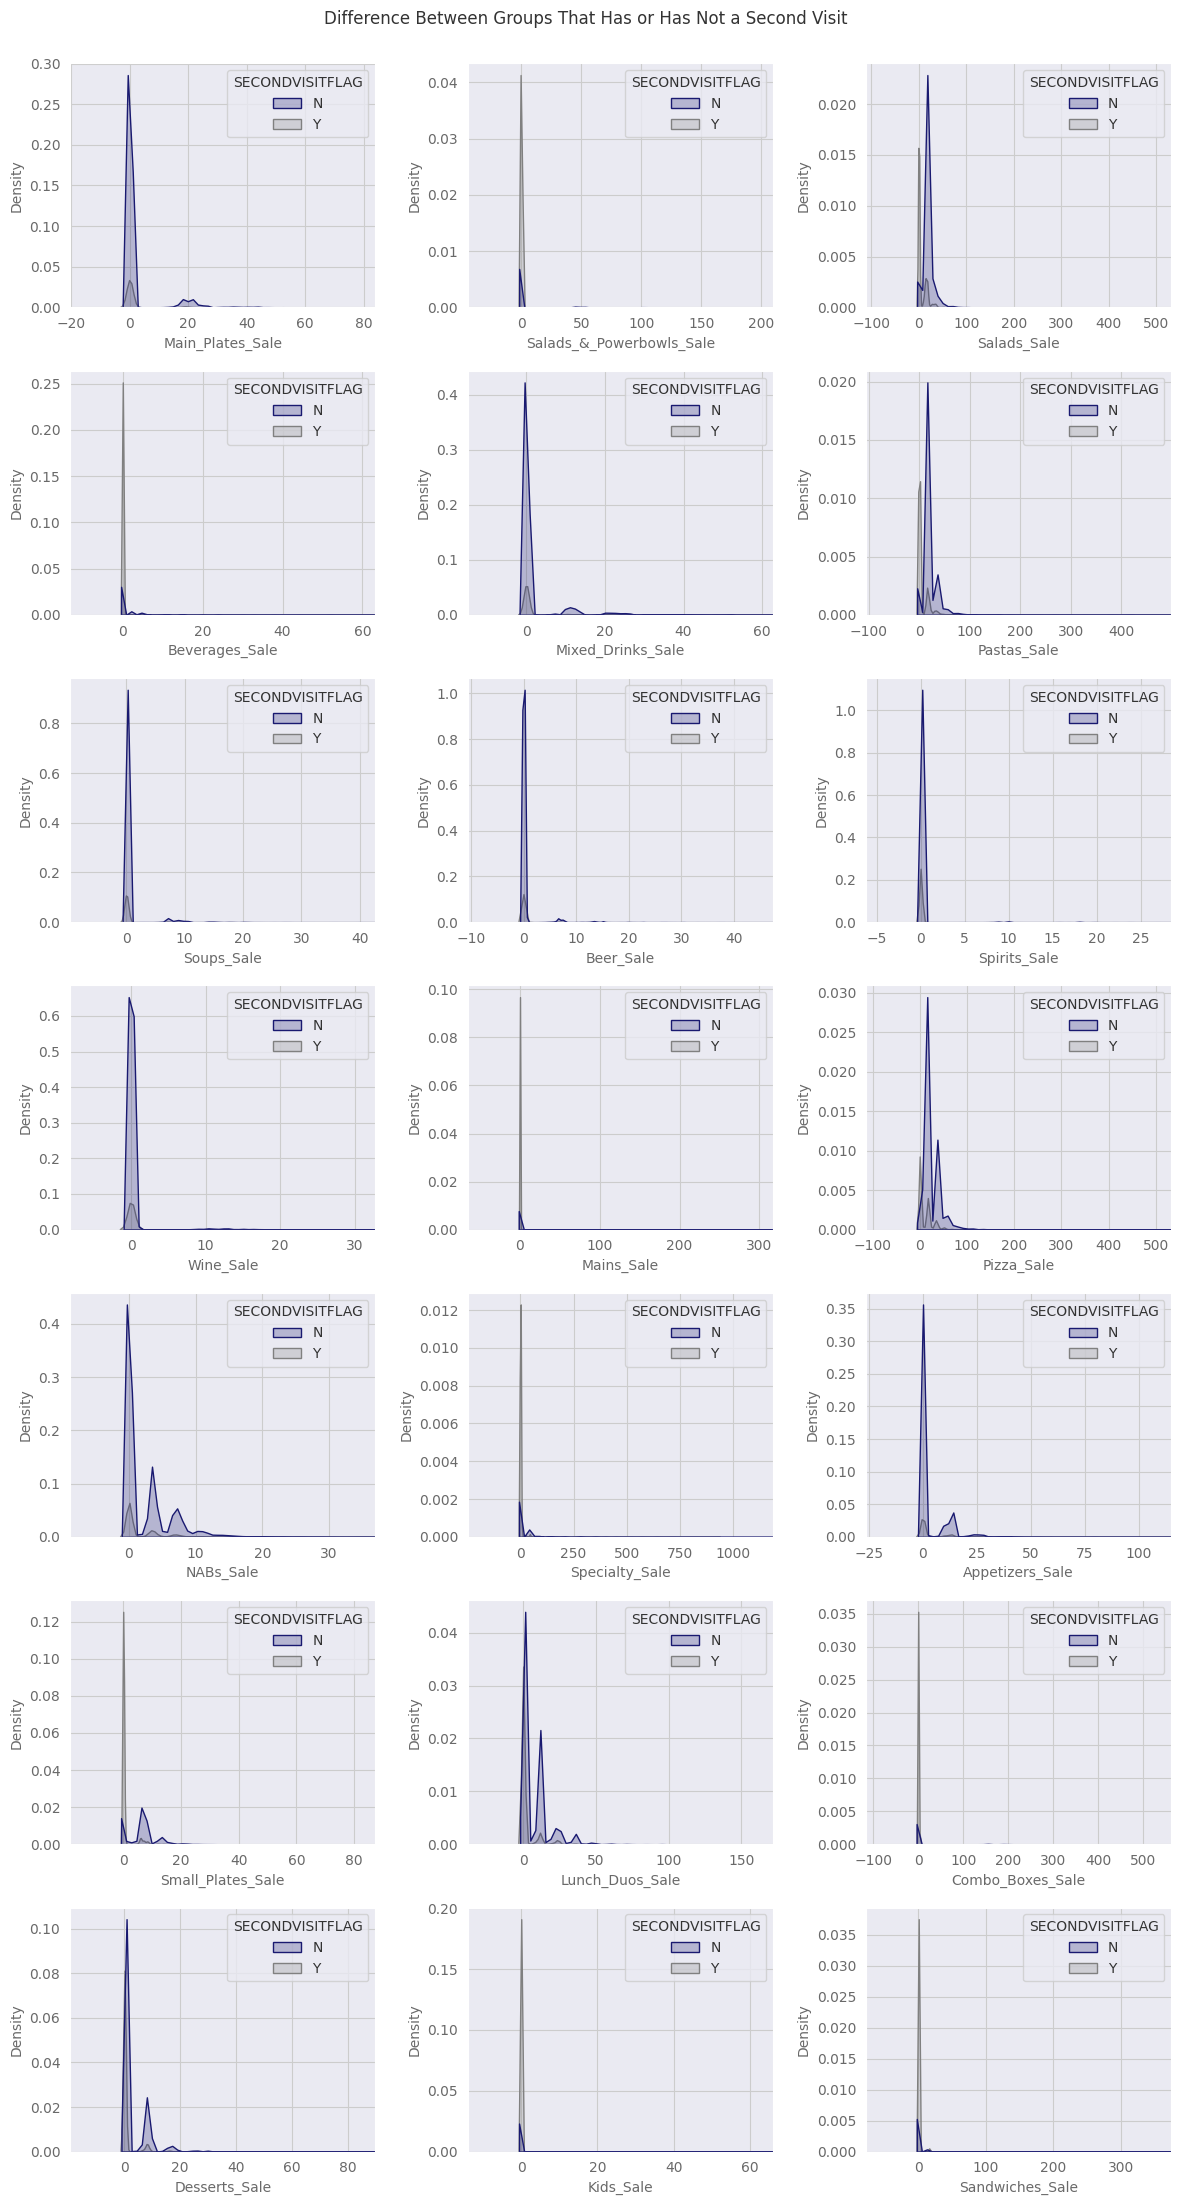

In [ ]:
# Plot charts that can demonstrate the differences in itens sales
# between groups that has and has not returned to the store

feat_cons= ['Main_Plates_Sale', 'Salads_&_Powerbowls_Sale', 'Salads_Sale', 'Beverages_Sale',
            'Mixed_Drinks_Sale', 'Pastas_Sale', 'Soups_Sale', 'Beer_Sale', 'Spirits_Sale',
            'Wine_Sale', 'Mains_Sale', 'Pizza_Sale', 'NABs_Sale', 'Specialty_Sale', 'Appetizers_Sale',
            'Small_Plates_Sale', 'Lunch_Duos_Sale', 'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale', 'Sandwiches_Sale']

n = len(feat_cons)

fig, axes = plt.subplots((n+1)//3, 3, figsize=(12,22))
axes= axes.flatten()

for i, col in enumerate(feat_cons):
  if i < n:
    ax= axes[i]

    sns.kdeplot(data= df, x= col, hue= 'SECONDVISITFLAG', fill= True, ax= ax)

    # Set the x-axis limit
    max_limit= df[col].max()/4
    ax.set_xlim(right= max_limit)

    ax.set_xlabel(col)

  else:
    ax.axis('off')  # turn off the axis for empty plots

fig.subplots_adjust(wspace= 0.3, hspace= 0.3)
fig.suptitle('Difference Between Groups That Has or Has Not a Second Visit', y= 1)
fig.tight_layout()
plt.show()


####From the above group of distribution charts it can be deduced that:

  * Some kind of orders are more associated with customers that return to the stores, for instance: sandwiches, kids, mains dishes, salads and beverages

  * Again, alcohol is not associated with customers who returns

  * Pizza and pasta are types of orders that stays in the middle term, but has patterns that are clearly different from the others.


## Feature Engineering

In [ ]:
# Create a new feature with total ammount of expenses

expenses_col = ['Main_Plates_Sale', 'Salads_&_Powerbowls_Sale', 'Salads_Sale', 'Beverages_Sale',
                'Mixed_Drinks_Sale', 'Pastas_Sale', 'Soups_Sale', 'Beer_Sale', 'Spirits_Sale', 'Wine_Sale',
                'Mains_Sale', 'Pizza_Sale', 'NABs_Sale', 'Specialty_Sale', 'Appetizers_Sale', 'Small_Plates_Sale',
                'Lunch_Duos_Sale', 'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale', 'Sandwiches_Sale']

df['Total_Expenses'] = df[expenses_col].sum(axis=1)


In [ ]:
# Create a new feature with total ammount of beverage expenses

beverages_col = ['Beverages_Sale', 'Mixed_Drinks_Sale', 'Beer_Sale',
                 'Spirits_Sale', 'Wine_Sale']

df['Total_Beverage_Expenses'] = df[beverages_col].sum(axis=1)

In [ ]:
# Create a new feature with total ammount of food expenses

food_col = ['Main_Plates_Sale', 'Salads_&_Powerbowls_Sale', 'Salads_Sale', 'Pastas_Sale', 'Soups_Sale',
                'Mains_Sale', 'Pizza_Sale', 'NABs_Sale', 'Specialty_Sale', 'Small_Plates_Sale', 'Lunch_Duos_Sale',
                'Combo_Boxes_Sale', 'Desserts_Sale', 'Kids_Sale', 'Sandwiches_Sale', 'Appetizers_Sale']

df['Total_Food_Expenses'] = df[food_col].sum(axis=1)

In [ ]:
# Create a new feature with total ammount of alcoholic drink expenses

drinks_col = ['Beer_Sale', 'Spirits_Sale', 'Wine_Sale', 'Mixed_Drinks_Sale']

df['Total_Alcohol_Expenses'] = df[drinks_col].sum(axis=1)

In [ ]:
# Create a new feature with total bill (total_expense - discount)

df['Total_Bill'] = df['Total_Expenses'] - df['TOTAL_DISCOUNT']

In [ ]:
# create a temp feature with percentual of alcoholic to confirm values

df['Percent_Alcohol'] = df['Total_Alcohol_Expenses'] / df['Total_Expenses'] * 100

In [ ]:
# Some values were applied with NaN, transform these entries to zero

df['Percent_Alcohol']= df['Percent_Alcohol'].fillna(0)

In [ ]:
# Convert categorical values of target into numerical binary values

df['SECONDVISITFLAG'] =df['SECONDVISITFLAG'].map({'Y': 1, 'N': 0}).astype(int)


In [ ]:
# Analyse sparsity of data - many zeros and few values in the food / beverages expenses columns

df_sparse = df[expenses_col]

num_zeros = (df_sparse == 0).sum()
total_elements = df_sparse.shape[0] * df_sparse.shape[1]
sparsity = (num_zeros / total_elements).sum().mean()

display(f"The sparsity of this subset is {round(sparsity, 4)}")

# It means that from all data entries in this subset, only 12% is "usable" data


'The sparsity of this subset is 0.8861'

In [ ]:
# Apply PCA to reduce dimensionality of this sparse subset of columns

pca = PCA(n_components = 0.95)
df_pca = pca.fit_transform(df_sparse)

# Re calculate sparsity of the subset after pca application
num_zeros = (df_pca == 0).sum()
total_elements = df_pca.shape[0] * df_pca.shape[1]
sparsity = (num_zeros / total_elements).sum().mean()

display(f"The sparsity of this subset after PCA is {round(sparsity, 4)}")

'The sparsity of this subset after PCA is 0.0'

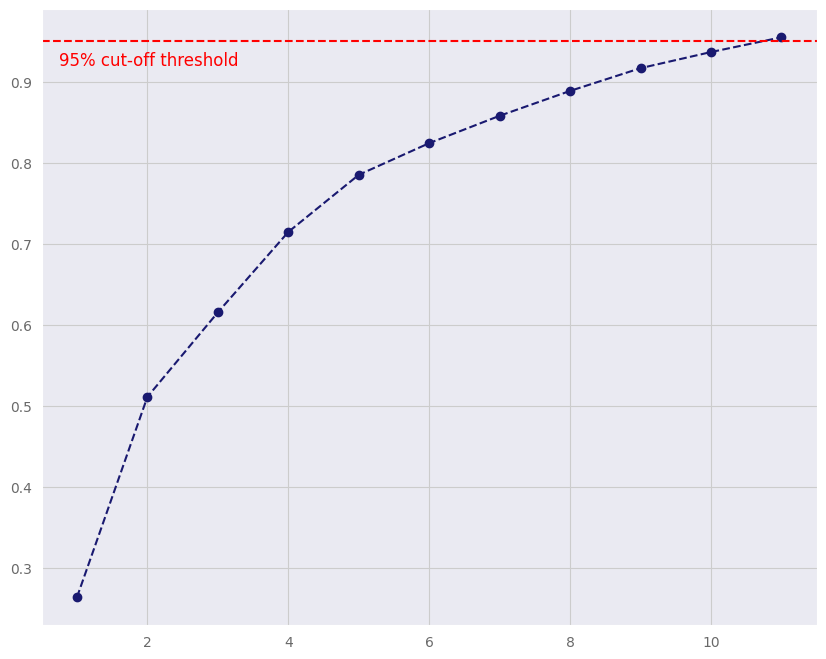

In [ ]:
# Determine the optimal number of resulting features in PCA

pca.explained_variance_ratio_ # This attribute shows how much variance is explained by each of the individual component

# It's possible to plot the cumulative value as below

plt.figure(figsize= (10, 8)) # size of the chart(size of the vectors)
cumulativeValue = pca.explained_variance_ratio_.cumsum() # get the cumulative sum

plt.plot(range(1,12), cumulativeValue, marker = 'o', linestyle="--")
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.75, 0.92, '95% cut-off threshold', color = 'red', fontsize=12)

plt.show()

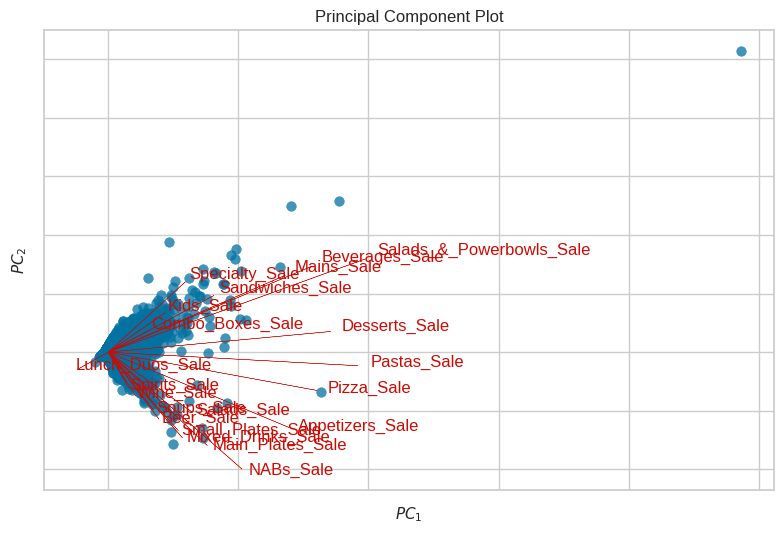

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [ ]:
# Visualize PCA with yellolwbricks

visualizer = PCA(proj_features=True)
visualizer.fit_transform(df_sparse)
visualizer.show()

In [ ]:
df_pca.shape

# PCA has transformed all sparse data into a set of 11 columns with most usable info

(239746, 11)

In [ ]:
# Merge the pca subset into original df

df_pca = pd.DataFrame(df_pca)

df.index = df.index.to_numpy()

df_merge_pca = pd.merge(df, df_pca, how= 'left', on= df.index)


#### Create cluster with K Means

In [ ]:
# Visualize elbow curve with yellowbricks

def elbow_yellow(values):
  kmeans = KMeans()
  visualizer = KElbowVisualizer(kmeans, k=(2, 12))
  visualizer.fit(df)
  visualizer.show()

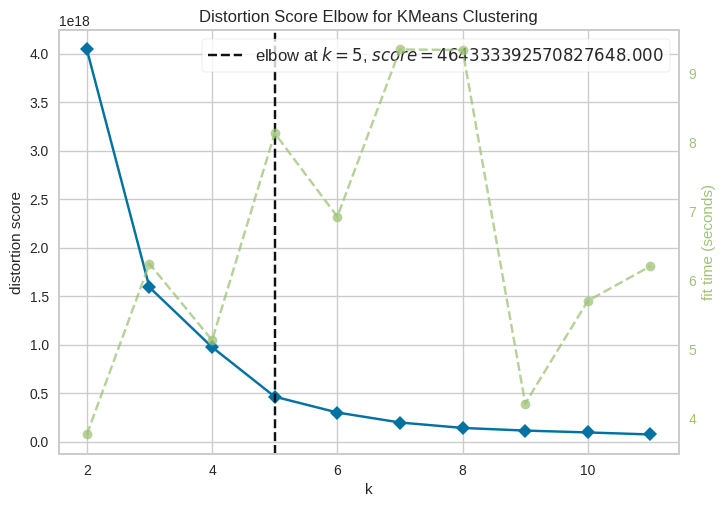

In [ ]:
elbow_yellow(df)

# 5 is the ideal number of clusters

In [ ]:
# Applying Kmeans with indicated number of groups

kmeans = KMeans(n_clusters= 5)
yKmeans = kmeans.fit_predict(df)


In [ ]:
# Create nem column with cluster number

df_merge_pca['Cluster_Kmeans'] = yKmeans


## Machine Learning Model

In [ ]:
# Copying the df to use in the model

df_model = df_merge_pca.copy()

In [ ]:
# Drop unnecessary columns

cols_to_drop = ['Customer_ID', '%_Alcohol_of_Bill']

df_model.drop(columns= cols_to_drop, axis= 0, inplace= True)

#### Data Splitting

In [ ]:
# Train Test Split

X= df_model.drop(columns= ['SECONDVISITFLAG'])

Y= df_model['SECONDVISITFLAG']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, stratify= Y, random_state= 71)


In [ ]:
# Showing the splitted dataframes

display(f'x_train has {x_train.shape} entries')
display(f'y_train has {y_train.shape} entries')
display(f'x_test has {x_test.shape} entries')
display(f'y_test has {y_test.shape} entries')

'x_train has (167822, 31) entries'

'y_train has (167822,) entries'

'x_test has (71924, 31) entries'

'y_test has (71924,) entries'

#### Applying Machine Learning Models

In [ ]:
# Defining a function to apply models
def model_apply (model, x_train, x_test, y_train):
  print('Applying ML Model')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  return y_pred

# Defining a function to evaluate model results
def evaluate_model (y_test, y_pred, model):
  print('Evaluating Model Results')
  accuracy = accuracy_score(y_test, y_pred) * 100
  recall = recall_score(y_test, y_pred) * 100
  print(f"Test Sample Accuracy: {accuracy}\n")
  print(f"Test Sample Recall: {recall}\n")
  print(f"Train Sample Score (comparision): {model.score(x_train, y_train)}\n")
  print(classification_report(y_test, y_pred))

  fig, axes = plt.subplots(1,2, figsize=(13,6))
  sns.heatmap(confusion_matrix(y_test, y_pred), fmt= 'g', cmap='YlOrBr', annot=True,cbar=False, ax=axes[0])
  sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), fmt= 'g', cmap='YlOrBr', annot=True, cbar=False, ax=axes[1])
  axes[0].set_title('Second Visit Values')
  axes[1].set_title('Second Visit Percentage')
  axes[0].set_xlabel('P R E D I C T')
  axes[0].set_ylabel('R E A L')
  axes[1].set_xlabel('P R E D I C T')
  axes[1].set_ylabel('R E A L')
  plt.show()

  if type(model) == DecisionTreeClassifier:
    plt.figure(figsize=(25, 12))
    plot_tree(model, filled= True)
    plt.show()

# Defining a function to evaluate classification feature importances
def feature_importance (model):
  feat_imp = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

  top_feat = feat_imp[:6]
  all_feat = feat_imp[::]

  fig, axes = plt.subplots(1,2, figsize=(17,8))
  top_feat.plot(kind='bar', ax=axes[0])
  all_feat.plot(kind='bar', ax=axes[1])
  axes[0].set_title(f"{model} - Top 6 Most Important Features")
  axes[1].set_title(f"{model} - All Feature Importances")

  return print('')

# Defining a function to plot ROC AUC curve and Score
def roc_curve_auc_score (x_test, y_test, model):

  y_pred_prob = model.predict_proba(x_test)[:,1]
  model_tfp, model_tvp, _= roc_curve(y_test, y_pred_prob)

  fig, axes = plt.subplots(1, figsize=(8,8))
  plt.plot([0,1], [0,1], 'r--')
  plt.plot(model_tfp, model_tvp, label='model')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.title(f"{model} - Roc Curve")
  plt.show()

  return print(f"AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n")

# Defining a function to store each model results
def append_results (model, y_test, y_pred, y_pred_prob):

  model_name.append(model.__class__.__name__)
  precision.append(precision_score(y_test, y_pred) * 100)
  accuracy.append(accuracy_score(y_test, y_pred) * 100)
  recall.append(recall_score(y_test, y_pred) * 100)
  roc_curve_sco.append(roc_auc_score(y_test, y_pred_prob) * 100)
  f1_sco.append(f1_score(y_test, y_pred) * 100)

  return print('Stored Results')

In [ ]:
# Defining a pipeline function to keep all previous functions together

def pipeline (model, x_train, x_test, y_train, y_test):

  y_pred = model_apply(model, x_train, x_test, y_train)
  y_pred_prob = model.predict_proba(x_test)[:,1]
  evaluate_model(y_test, y_pred, model)
  feature_importance(model)
  roc_curve_auc_score(x_test, y_test, model)
  append_results (model, y_test, y_pred, y_pred_prob)
  y_train_score = model.predict_proba(x_train)[:, 1]


  return print('Complete Pipeline Function Apllied \n')

In [ ]:
# Creating empty lists to store data from each model results

model_name = []
precision = []
accuracy = []
recall = []
roc_curve_sco = []
f1_sco = []

result_data = []

In [ ]:
# Choosing which models are going to be tested

tree = DecisionTreeClassifier(class_weight= 'balanced', max_depth=5, random_state= 71)

r_forest = RandomForestClassifier(random_state= 71)

xgboostclassifier = XGBClassifier(random_state= 71)

lgbm = LGBMClassifier(class_weight= 'balanced', random_state= 71)


models = [tree, r_forest, xgboostclassifier, lgbm]

eval_feat_importance = [tree, r_forest, xgboostclassifier, lgbm]

###Decision Tree Model

Applying ML Model
Evaluating Model Results
Test Sample Accuracy: 56.25660419331516

Test Sample Recall: 64.12

Train Sample Score (comparision): 0.5610408647257213

              precision    recall  f1-score   support

           0       0.93      0.55      0.69     64424
           1       0.14      0.64      0.23      7500

    accuracy                           0.56     71924
   macro avg       0.54      0.60      0.46     71924
weighted avg       0.85      0.56      0.65     71924



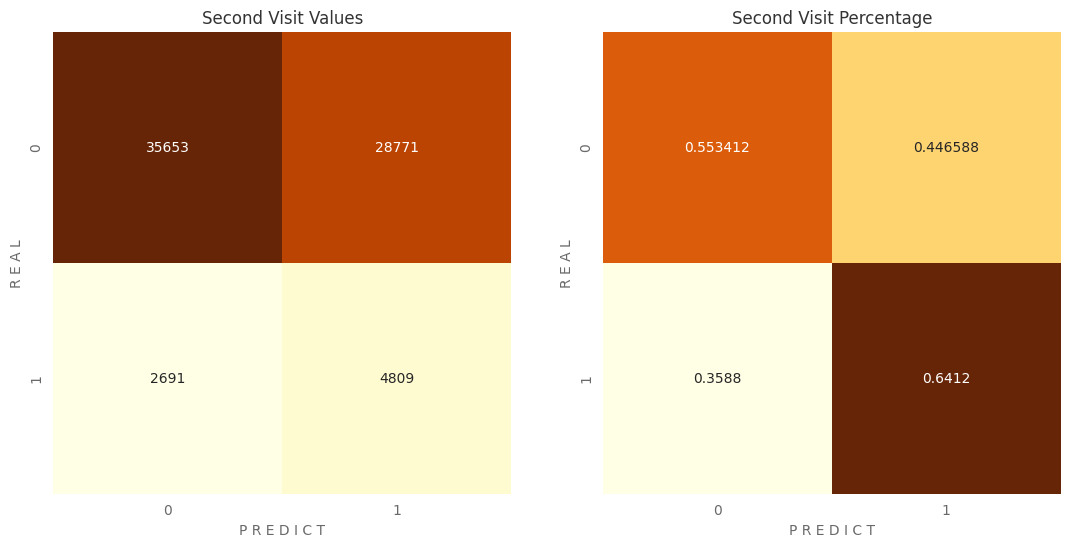

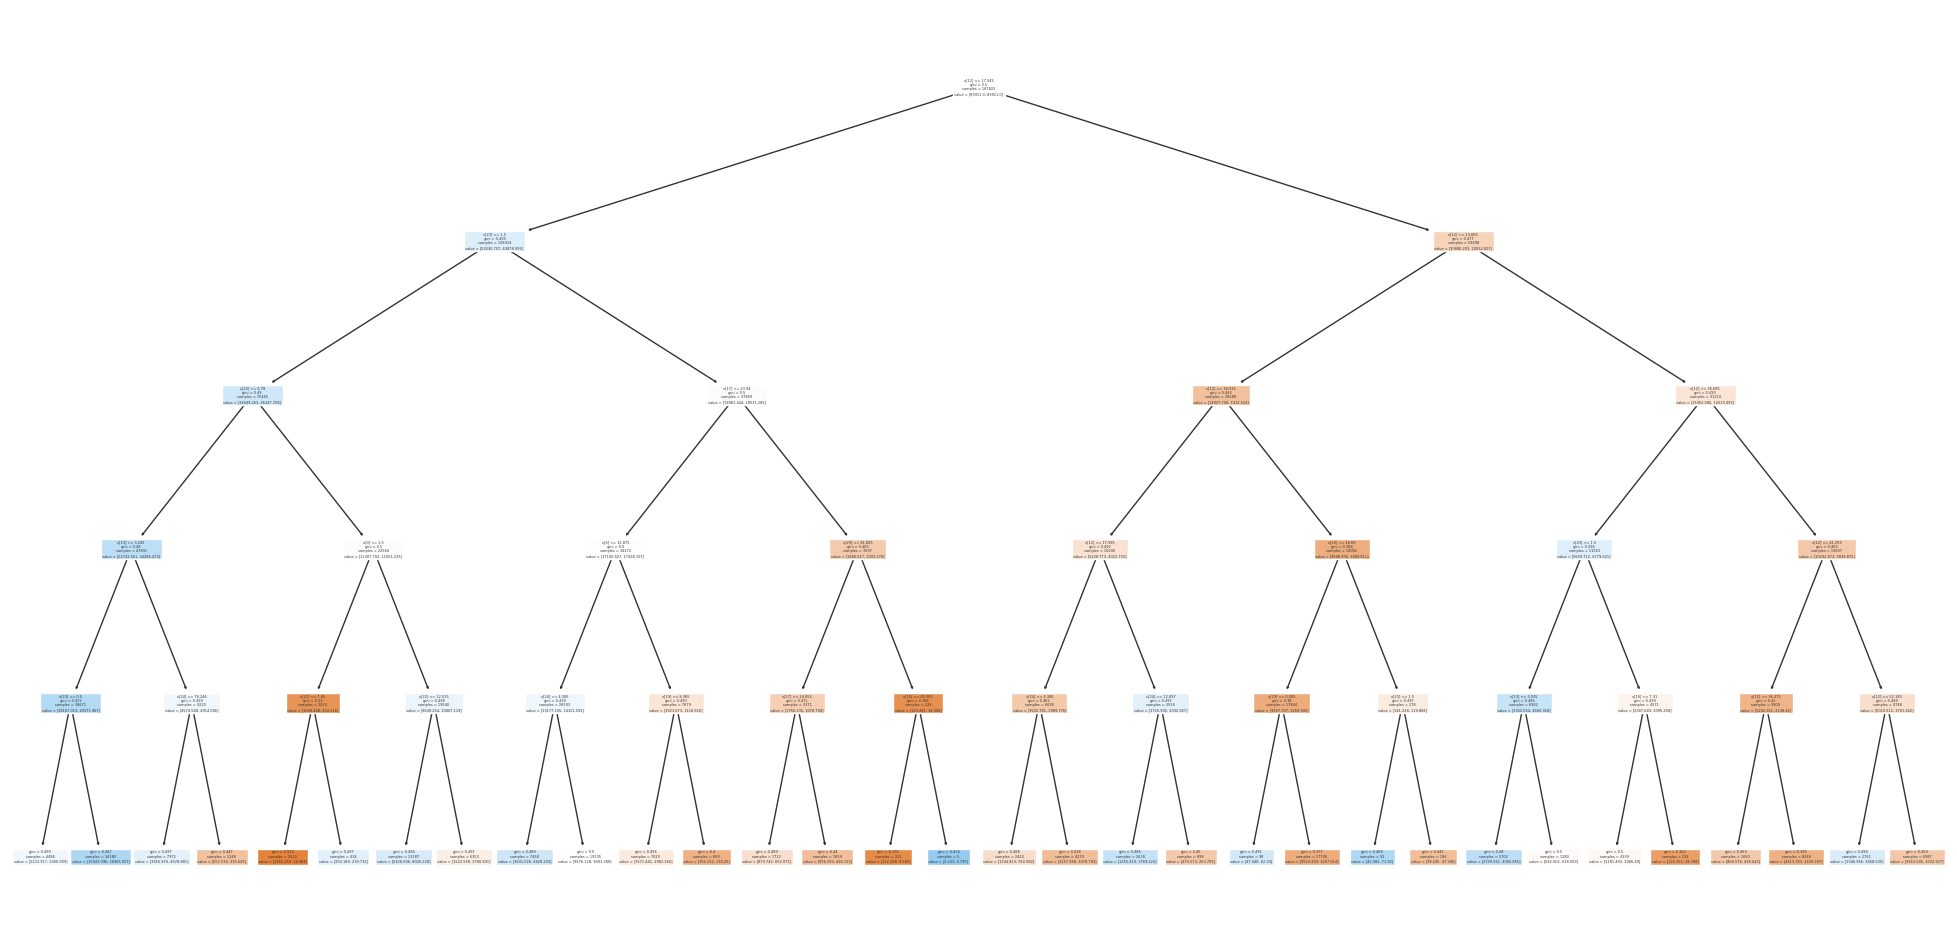

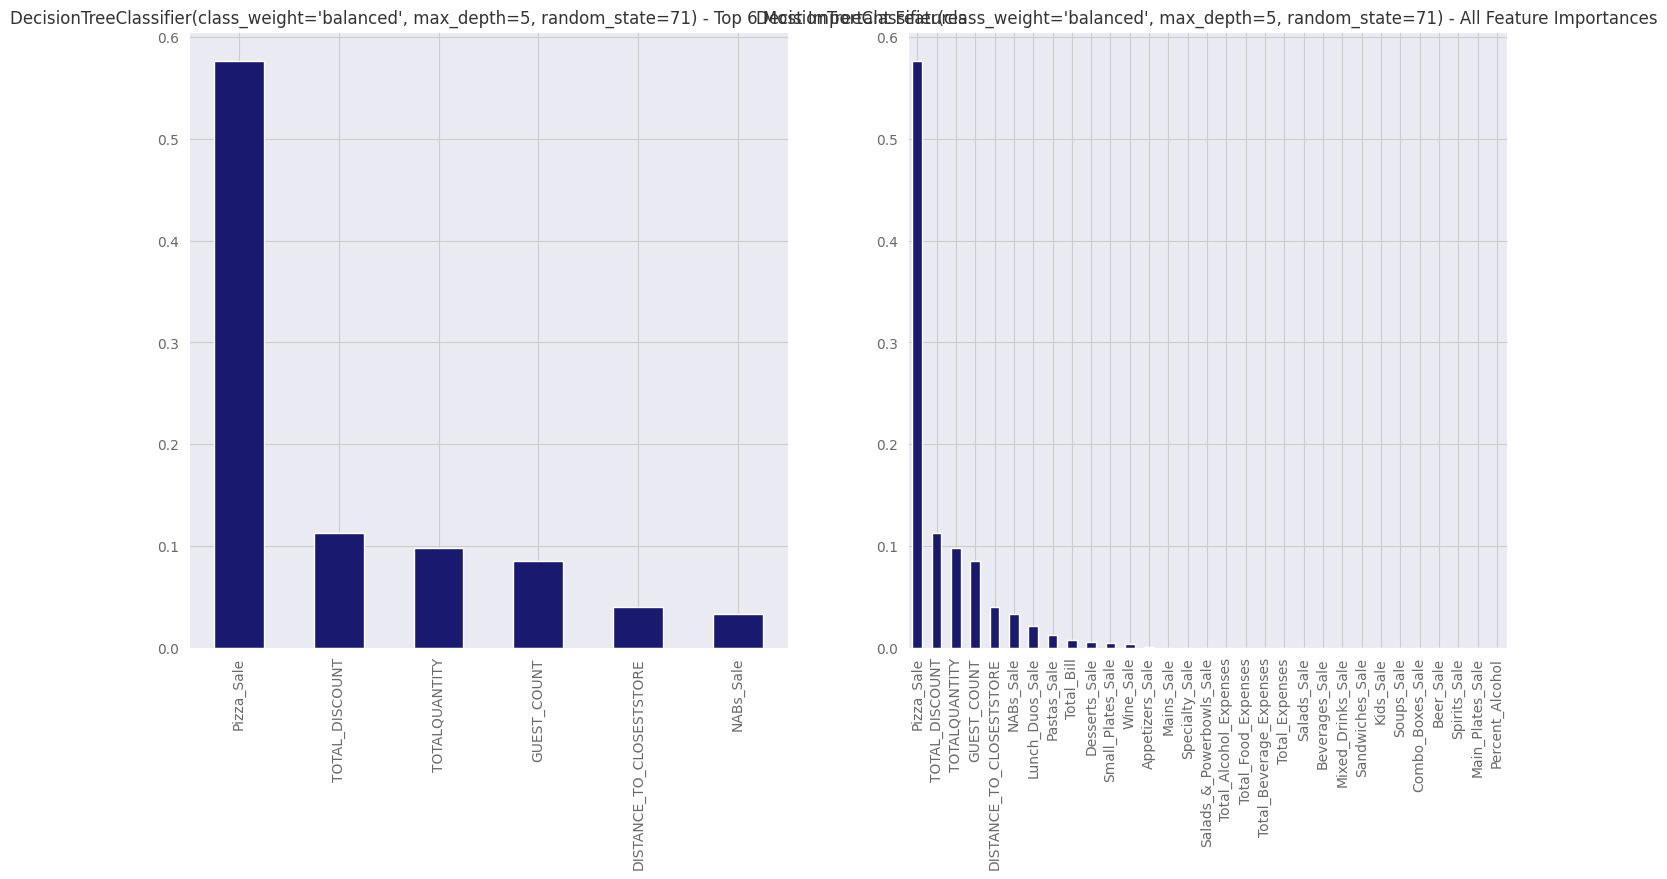

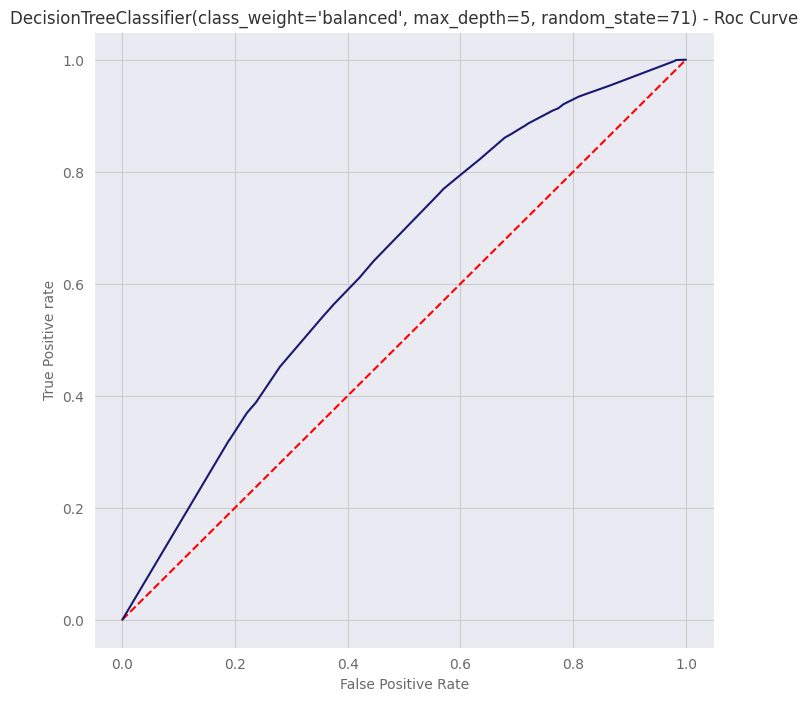

AUC Score (ROC): 0.6343418156794569

Stored Results
Complete Pipeline Function Apllied 



In [ ]:
# Parameter space to test Decision Tree Model

model = DecisionTreeClassifier(class_weight= 'balanced', max_depth=5, random_state= 71)

tree_parameter_space = {'criterion': ['gini', 'entropy'],
                      'max_depth': [4, 5, 6, 7],
                      'min_samples_leaf': [5, 8, 10, 15, 20],
                      'min_samples_split': [2, 5, 10, 15]
                        }

pipeline (model, x_train, x_test, y_train, y_test)

In [ ]:
# Using bayes search CV in the model to hyperparameter tunning

bayes_search = BayesSearchCV(model, tree_parameter_space, cv= 5, scoring= 'roc_auc',
                                 n_iter= 20, verbose= 0, random_state= 71)

bayes_search.fit(x_train, y_train)

print(f"Average Train Score: {bayes_search.score(x_train, y_train).mean()}\n")
print(f"Average Test Score: {bayes_search.score(x_test, y_test).mean()}\n")

print(f"The best parameters to estimate y_predict:\n{bayes_search.best_estimator_}\n")
print(f"The greatest Score between all tested parameters:\n{bayes_search.best_score_}\n")
print(f"The best parameters combination:\n{bayes_search.best_params_}\n")

Average Train Score: 0.6582815658136333

Average Test Score: 0.6417585568525189

The best parameters to estimate y_predict:
DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=15, min_samples_split=15,
                       random_state=71)

The greatest Score between all tested parameters:
0.6397725794579875

The best parameters combination:
OrderedDict([('criterion', 'gini'), ('max_depth', 7), ('min_samples_leaf', 15), ('min_samples_split', 15)])



###Random Forest Model

In [ ]:
# Defining hyperparameters of random Forest

model = RandomForestClassifier(class_weight= 'balanced', random_state= 71)

rf_parameter_space = {'criterion': ['gini', 'entropy'],
                      'max_depth': [8, 9, 10, 12, 15],
                      'min_samples_leaf': [5, 8, 10, 15],
                      'min_samples_split': [20, 30, 40, 50, 75, 100],
                      'n_estimators' : [30, 40, 50, 60, 70, 80]
                      }


Applying ML Model
Evaluating Model Results
Test Sample Accuracy: 87.50764696068072

Test Sample Recall: 6.4399999999999995

Train Sample Score (comparision): 0.9810573107220746

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     64424
           1       0.20      0.06      0.10      7500

    accuracy                           0.88     71924
   macro avg       0.55      0.52      0.51     71924
weighted avg       0.83      0.88      0.85     71924



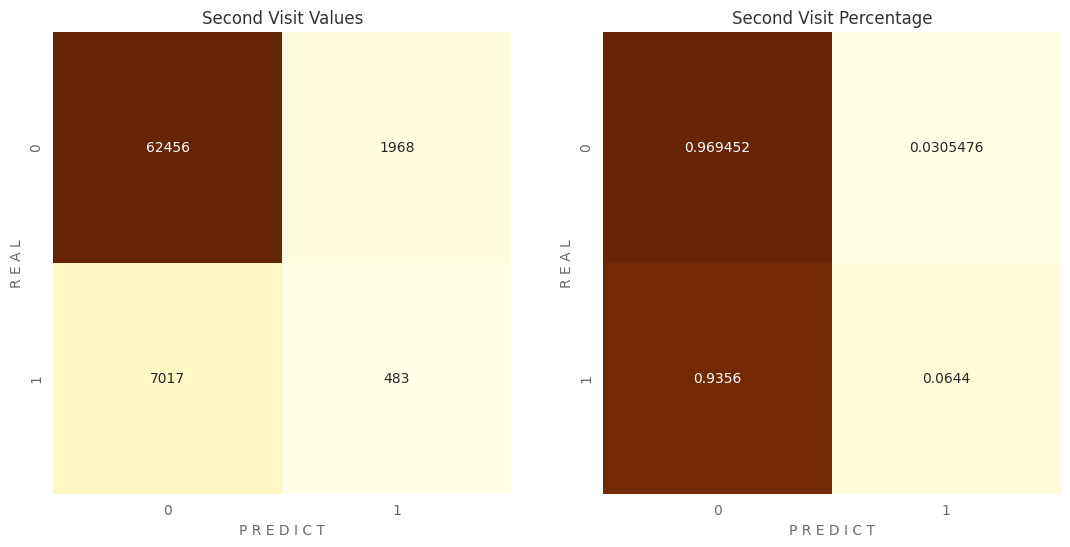

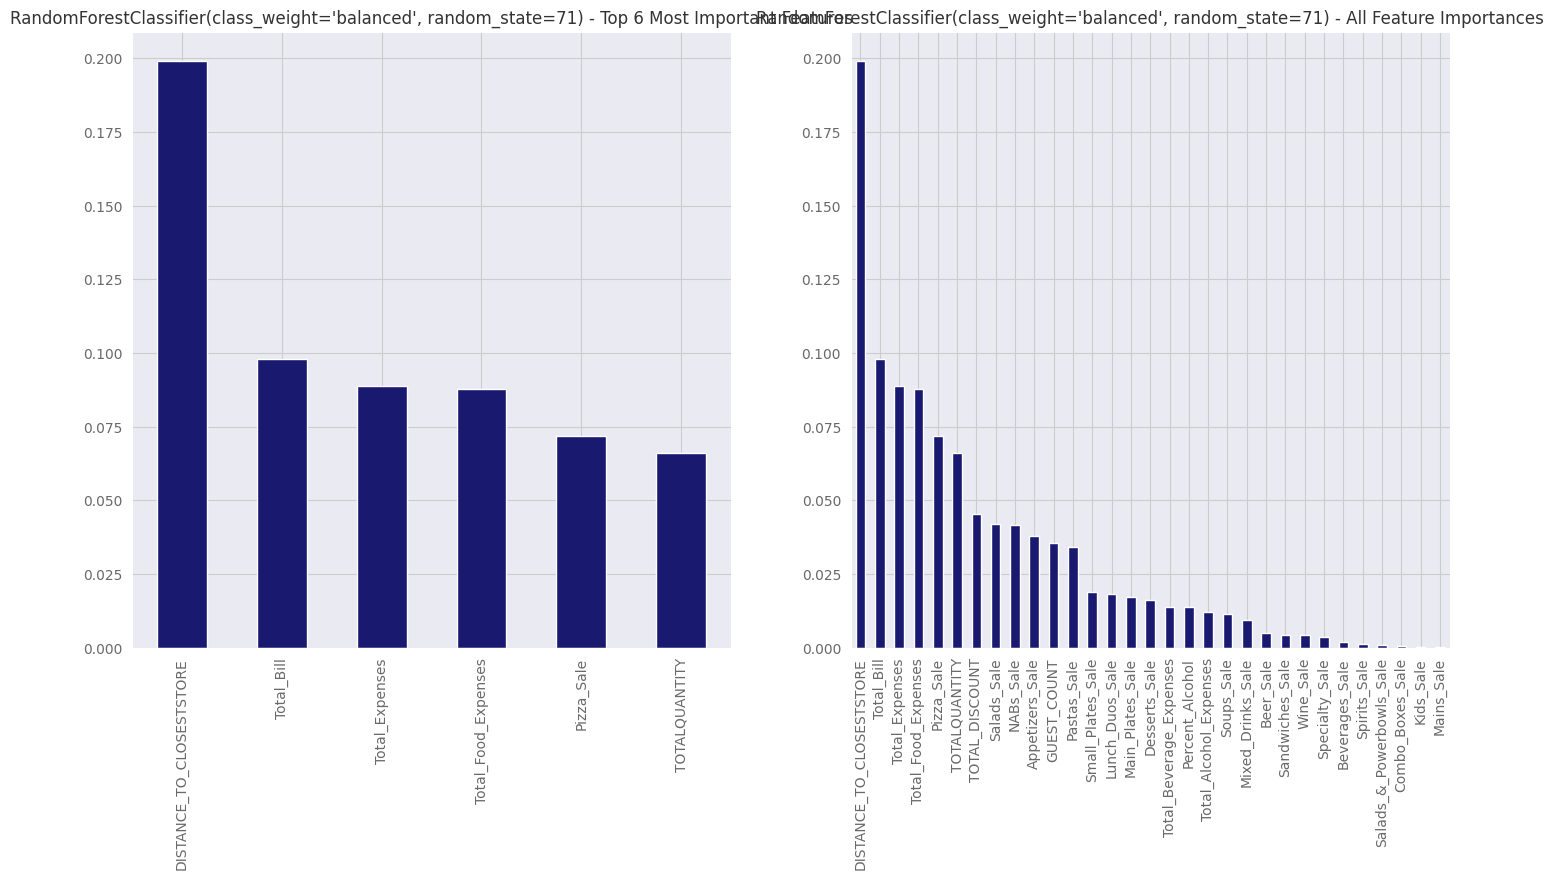

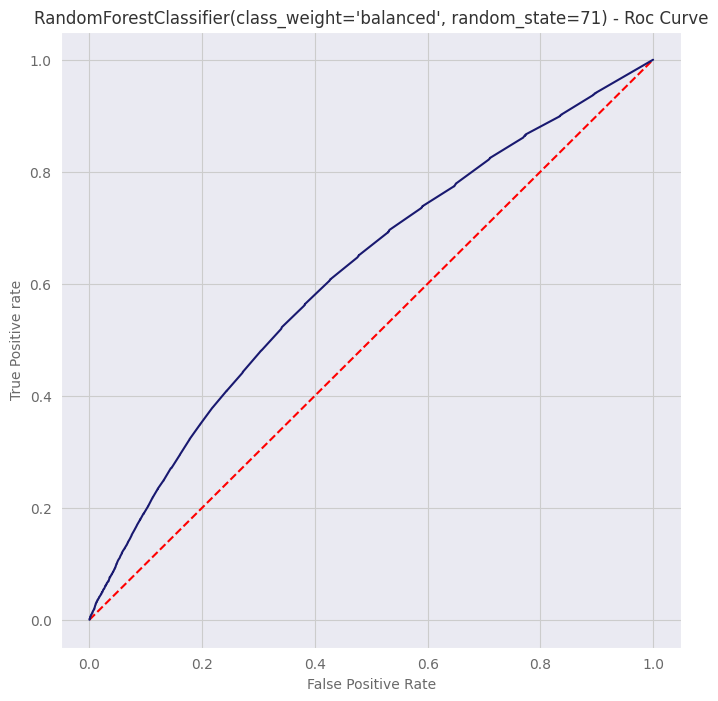

AUC Score (ROC): 0.6166938066559047

Stored Results
Complete Pipeline Function Apllied 



In [ ]:
# Random Forest model

pipeline (model, x_train, x_test, y_train, y_test)


In [ ]:
# Using bayes search CV in the model to hyperparameter tunning

bayes_search = BayesSearchCV(model, rf_parameter_space, cv= 5, scoring= 'roc_auc',
                                 n_iter= 20, verbose= 0, random_state= 71)

bayes_search.fit(x_train, y_train)

print(f"Average Train Score: {bayes_search.score(x_train, y_train).mean()}\n")
print(f"Average Test Score: {bayes_search.score(x_test, y_test).mean()}\n")

print(f"The best parameters to estimate y_predict:\n{bayes_search.best_estimator_}\n")
print(f"The greatest Score between all tested parameters:\n{bayes_search.best_score_}\n")
print(f"The best parameters combination:\n{bayes_search.best_params_}\n")

Average Train Score: 0.7715479926801188

Average Test Score: 0.6696093991887082

The best parameters to estimate y_predict:
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=15, min_samples_split=75,
                       n_estimators=80, random_state=71)

The greatest Score between all tested parameters:
0.6669051216363492

The best parameters combination:
OrderedDict([('criterion', 'entropy'), ('max_depth', 15), ('min_samples_leaf', 15), ('min_samples_split', 75), ('n_estimators', 80)])



### Extra Gradient Boost - XGBoost Model

In [ ]:
# Defining parameter space for XGBoost

model = XGBClassifier(random_state= 71)

xgboost_parameter = {'learning_rate' : [.001, .01, 1],
                    'max_depth' : [5, 8, 10, 15],
                    'n_estimators' : [30, 40, 50, 60, 70, 80],
                    'gamma' : [0.8, 1, 2, 5, 7, 10],
                    'reg_alpha' : [0, 0.05, 0.1, 1],
                    'reg_lambda' : [0, 0.1, 1, 2, 5]
                    }

Applying ML Model
Evaluating Model Results
Test Sample Accuracy: 89.52505422390301

Test Sample Recall: 0.17333333333333334

Train Sample Score (comparision): 0.8972721097353148

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     64424
           1       0.22      0.00      0.00      7500

    accuracy                           0.90     71924
   macro avg       0.56      0.50      0.47     71924
weighted avg       0.82      0.90      0.85     71924



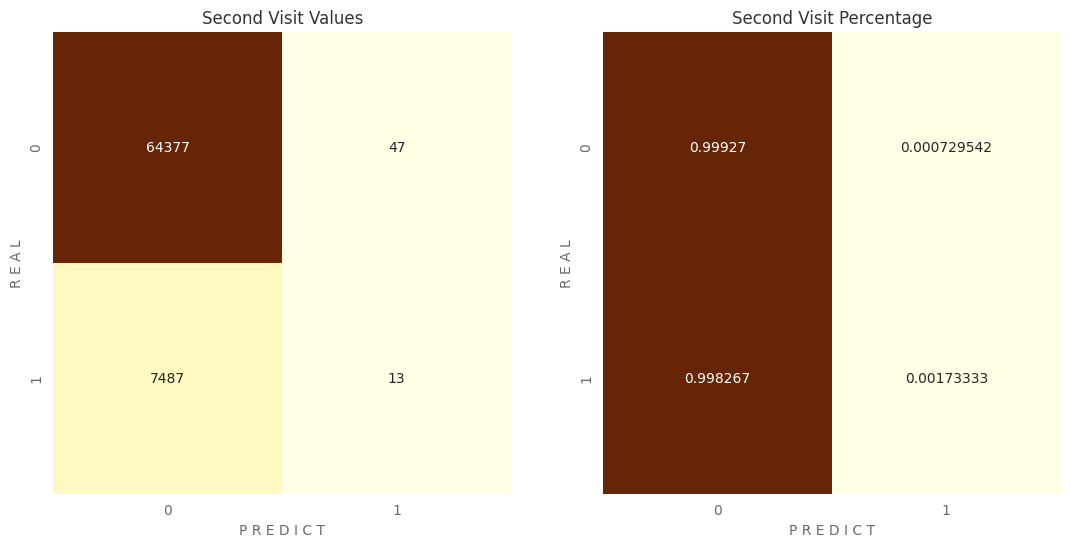

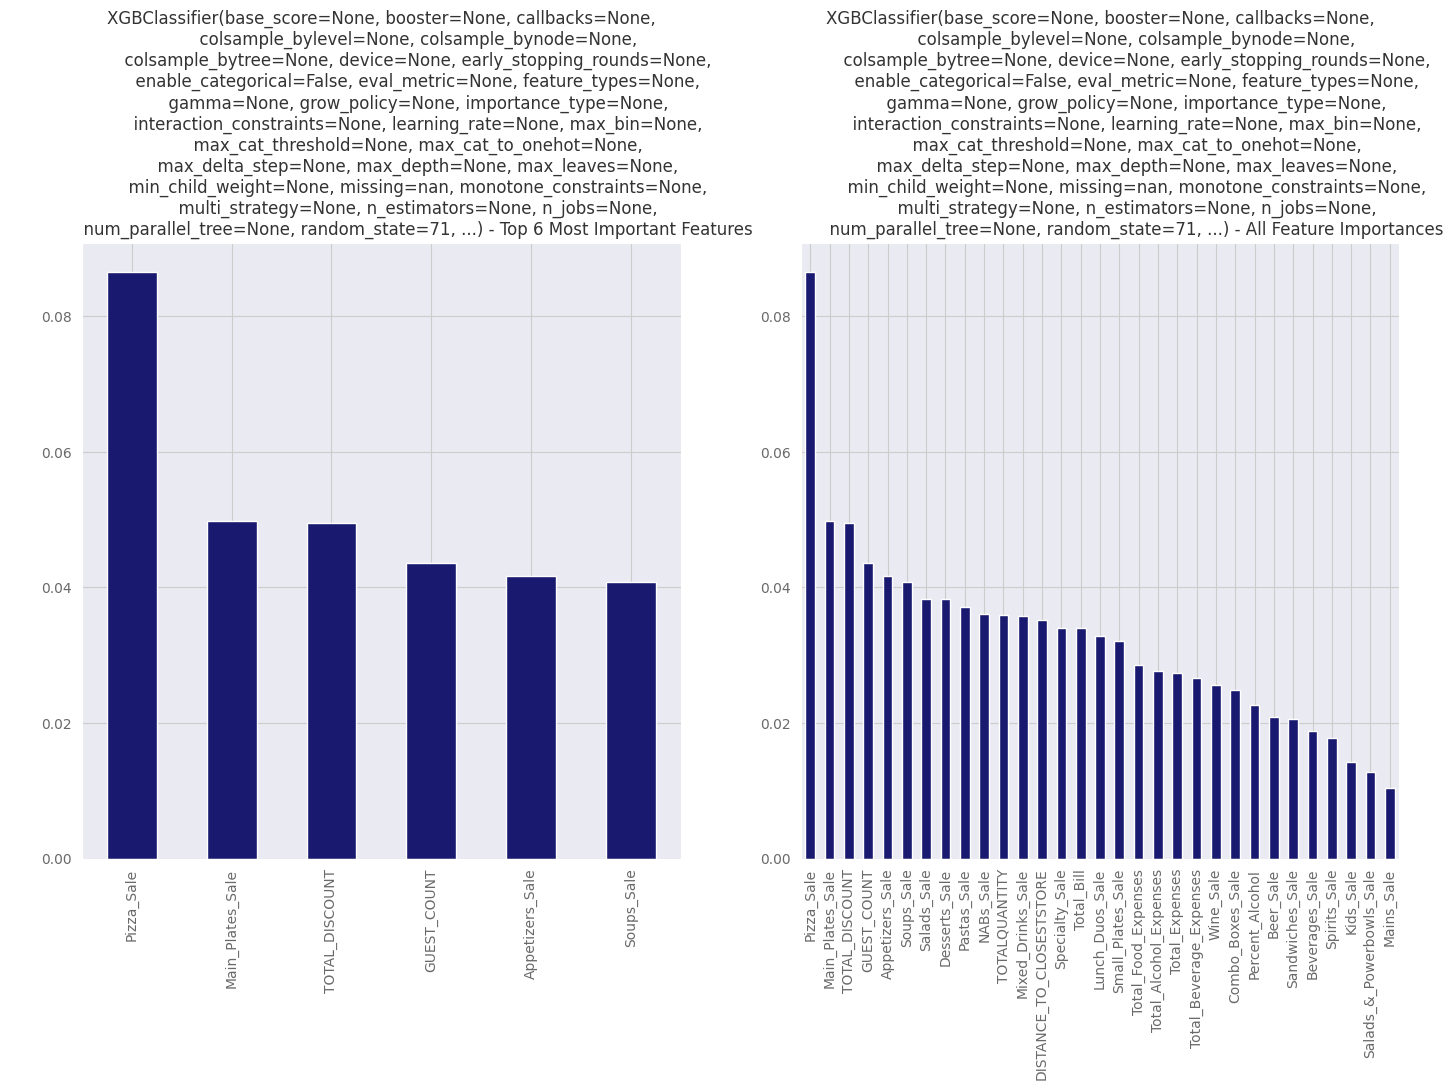

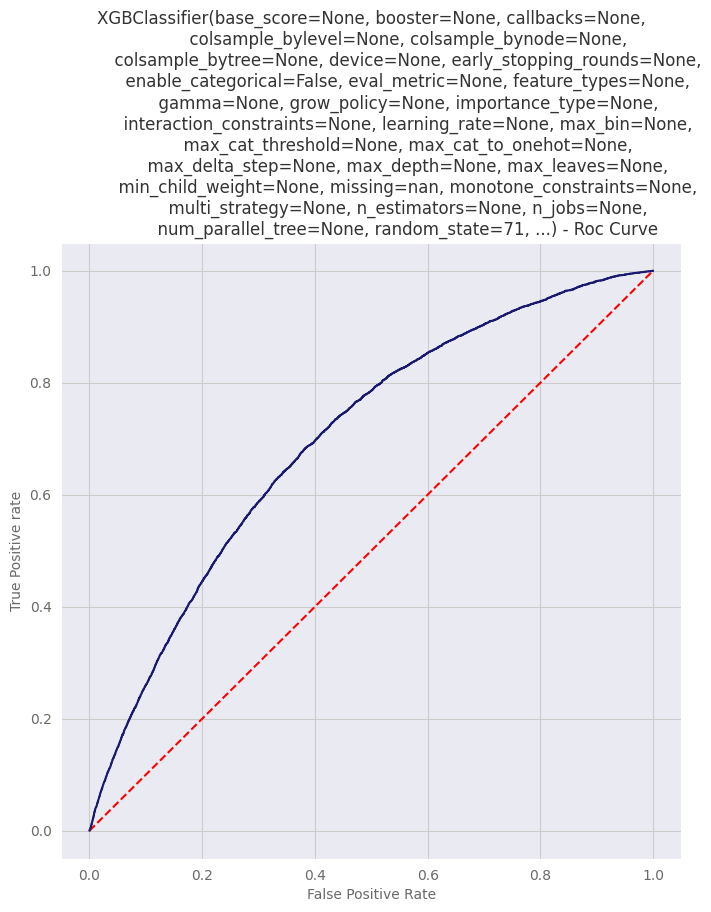

AUC Score (ROC): 0.6992483794859059

Stored Results
Complete Pipeline Function Apllied 



In [ ]:
# XGBoost model

pipeline (model, x_train, x_test, y_train, y_test)

In [ ]:
# Using bayes search CV in the model to hyperparameter tunning

bayes_search = BayesSearchCV(model, xgboost_parameter, cv= 5, scoring= 'roc_auc',
                                 n_iter= 20, verbose= 0, random_state= 71)

bayes_search.fit(x_train, y_train)

print(f"Average Train Score: {bayes_search.score(x_train, y_train).mean()}\n")
print(f"Average Test Score: {bayes_search.score(x_test, y_test).mean()}\n")

print(f"The best parameters to estimate y_predict:\n{bayes_search.best_estimator_}\n")
print(f"The greatest Score between all tested parameters:\n{bayes_search.best_score_}\n")
print(f"The best parameters combination:\n{bayes_search.best_params_}\n")

Average Train Score: 0.7291922750411352

Average Test Score: 0.6857102353160314

The best parameters to estimate y_predict:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=71, ...)

The greatest Score between all tested parameters:
0.678586969798871

The best parameters combination:
OrderedDict([('gamma', 5), (

### Light GBM Model

In [ ]:
# Defining parameters for LGBM Classifier

ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1] # ratio used for scale_pos_weight parameter
model = LGBMClassifier(scale_pos_weight= ratio,random_state=71)

lgbm_parameter_space = { 'classifier__num_leaves': [20, 30, 50],
                         'classifier__max_depth': [3, 5, 10, 20],
                         'classifier__learning_rate': [0.035, 0.05, 0.1],
                         'classifier__n_estimators': [20, 30, 40],
                         'classifier__min_child_samples': [ 20, 50, 60],
                         'classifier__min_child_weight': [1e-2, 1e-1, 1],
                         'classifier__subsample': [0.5, 0.8, 0.9, 1.0],
                         'classifier__colsample_bytree': [0.6, 0.8, 1],
                         'classifier__reg_alpha': [0, 0.01, 0.1, 1],
                         'classifier__reg_lambda': [0, 0.01, 0.1, 1],
                         'classifier__boosting_type': ['gbdt', 'dart', 'goss'],
                         'verbose': [-1]
                         }


Applying ML Model
[LightGBM] [Info] Number of positive: 17501, number of negative: 150321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6033
[LightGBM] [Info] Number of data points in the train set: 167822, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.104283 -> initscore=-2.150515
[LightGBM] [Info] Start training from score -2.150515
Evaluating Model Results
Test Sample Accuracy: 61.01023302374728

Test Sample Recall: 69.86666666666666

Train Sample Score (comparision): 0.6185482237132199

              precision    recall  f1-score   support

           0       0.94      0.60      0.73     64424
           1       0.17      0.70      0.27      7500

    accuracy                           0.61     71924
   macro avg       0.56      0.65      0.50  

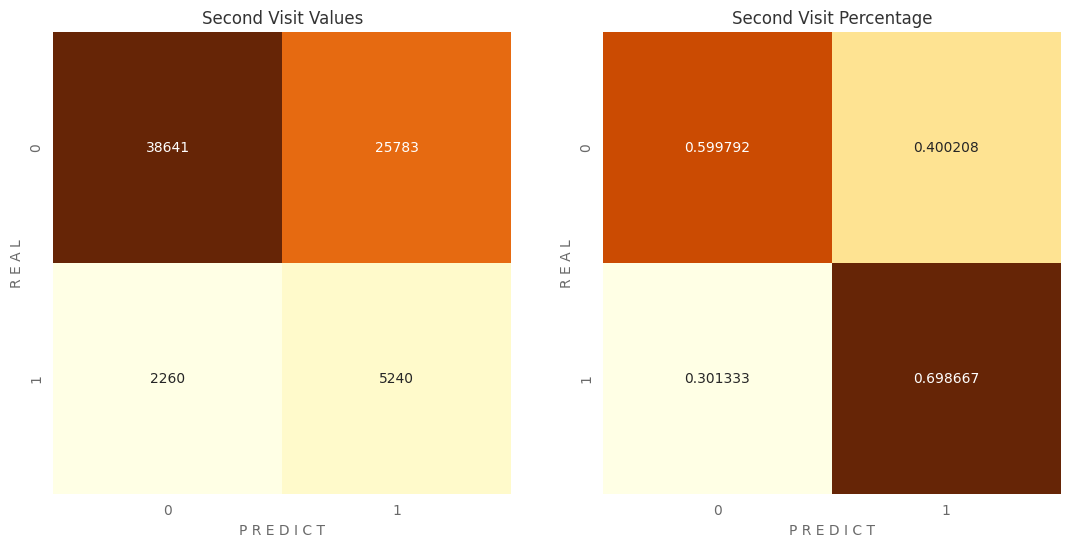

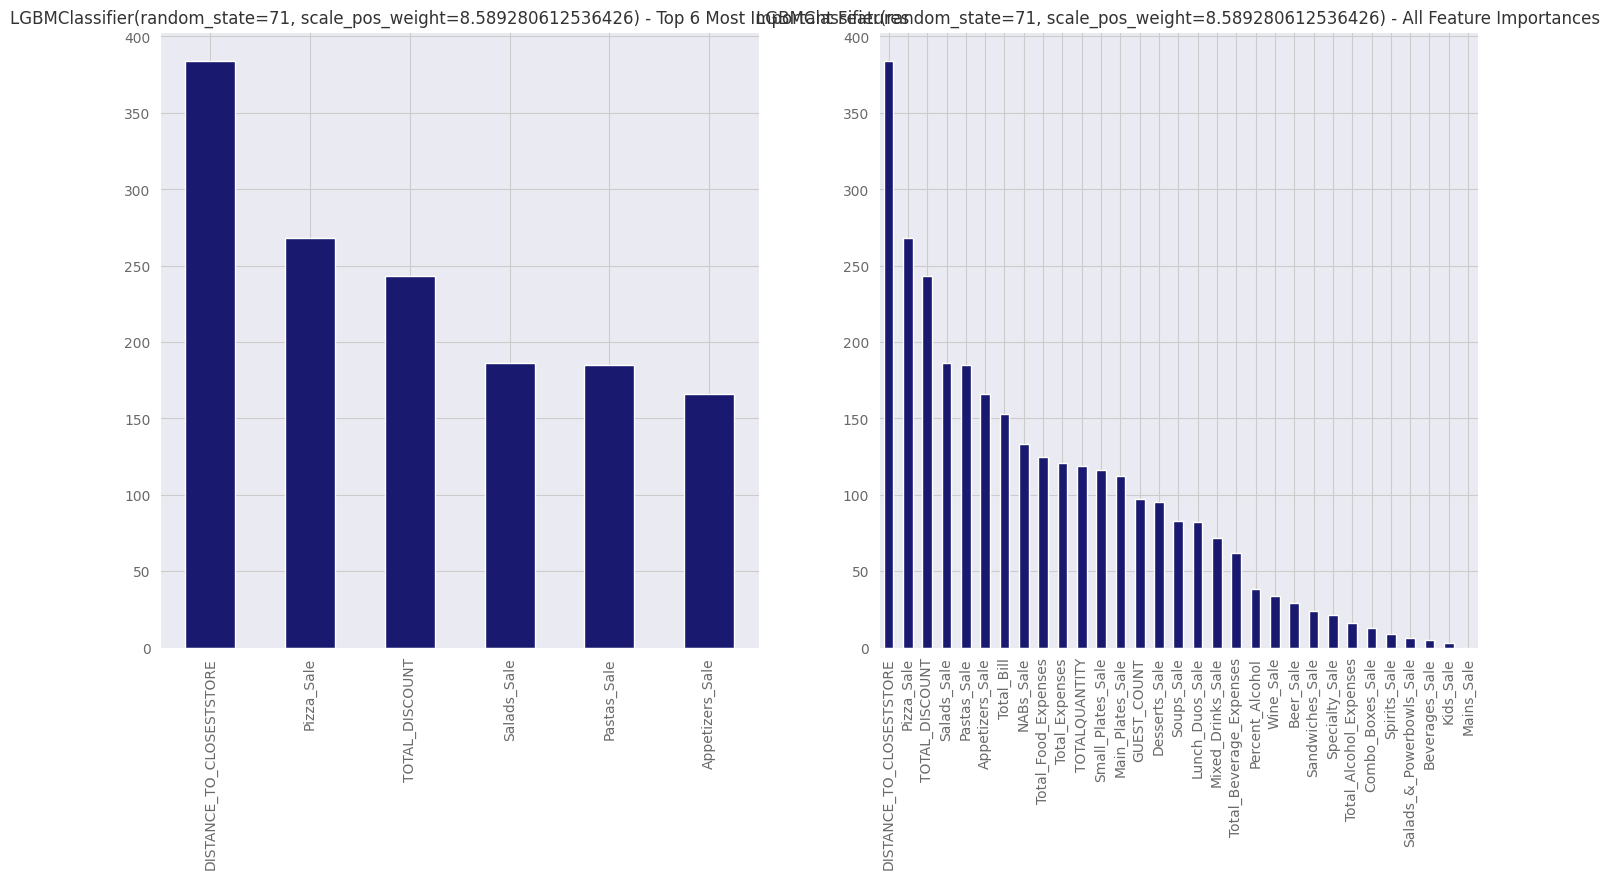

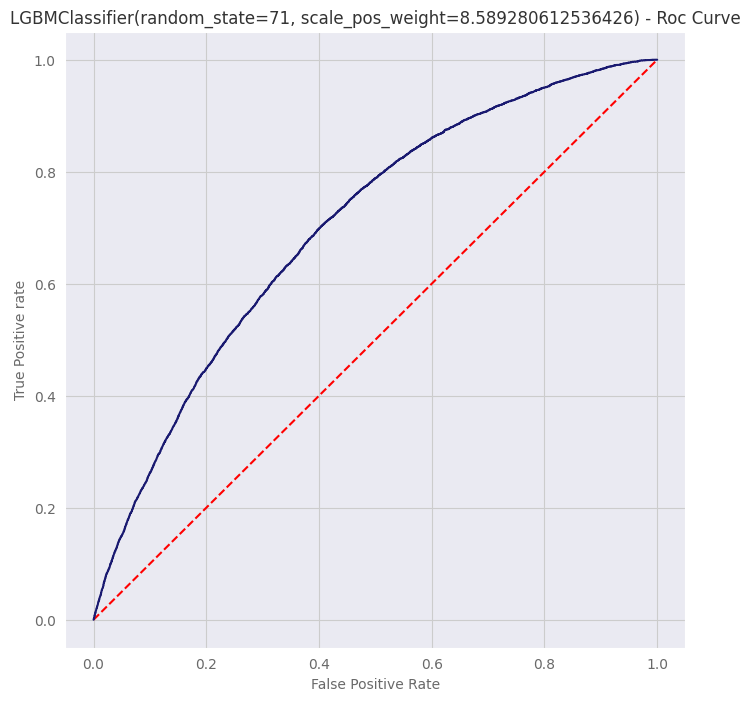

AUC Score (ROC): 0.7012139616705989

Stored Results
Complete Pipeline Function Apllied 



In [ ]:
# Light GBM model

pipeline (model, x_train, x_test, y_train, y_test)


In [ ]:
# Using bayes search CV in the model to hyperparameter tunning

bayes_search = BayesSearchCV(model, lgbm_parameter_space, cv= 5, scoring= 'roc_auc',
                                 n_iter= 20, verbose= 0, random_state= 71)

bayes_search.fit(x_train, y_train)

print(f"Average Train Score: {bayes_search.score(x_train, y_train).mean()}\n")
print(f"Average Test Score: {bayes_search.score(x_test, y_test).mean()}\n")

print(f"The best parameters to estimate y_predict:\n{bayes_search.best_estimator_}\n")
print(f"The greatest Score between all tested parameters:\n{bayes_search.best_score_}\n")
print(f"The best parameters combination:\n{bayes_search.best_params_}\n")

Average Train Score: 0.743101537465552

Average Test Score: 0.7012139616705989

The best parameters to estimate y_predict:
LGBMClassifier(classifier__boosting_type='dart',
               classifier__colsample_bytree=0.8, classifier__learning_rate=0.1,
               classifier__max_depth=10, classifier__min_child_samples=20,
               classifier__min_child_weight=0.01, classifier__n_estimators=40,
               classifier__num_leaves=30, classifier__reg_alpha=0,
               classifier__reg_lambda=0.1, classifier__subsample=0.5,
               random_state=71, scale_pos_weight=8.589280612536426, verbose=-1)

The greatest Score between all tested parameters:
0.6968016816254587

The best parameters combination:
OrderedDict([('classifier__boosting_type', 'dart'), ('classifier__colsample_bytree', 0.8), ('classifier__learning_rate', 0.1), ('classifier__max_depth', 10), ('classifier__min_child_samples', 20), ('classifier__min_child_weight', 0.01), ('classifier__n_estimators', 40), ('

Applying ML Model
Evaluating Model Results
Test Sample Accuracy: 61.01023302374728

Test Sample Recall: 69.86666666666666

Train Sample Score (comparision): 0.6185482237132199

              precision    recall  f1-score   support

           0       0.94      0.60      0.73     64424
           1       0.17      0.70      0.27      7500

    accuracy                           0.61     71924
   macro avg       0.56      0.65      0.50     71924
weighted avg       0.86      0.61      0.69     71924



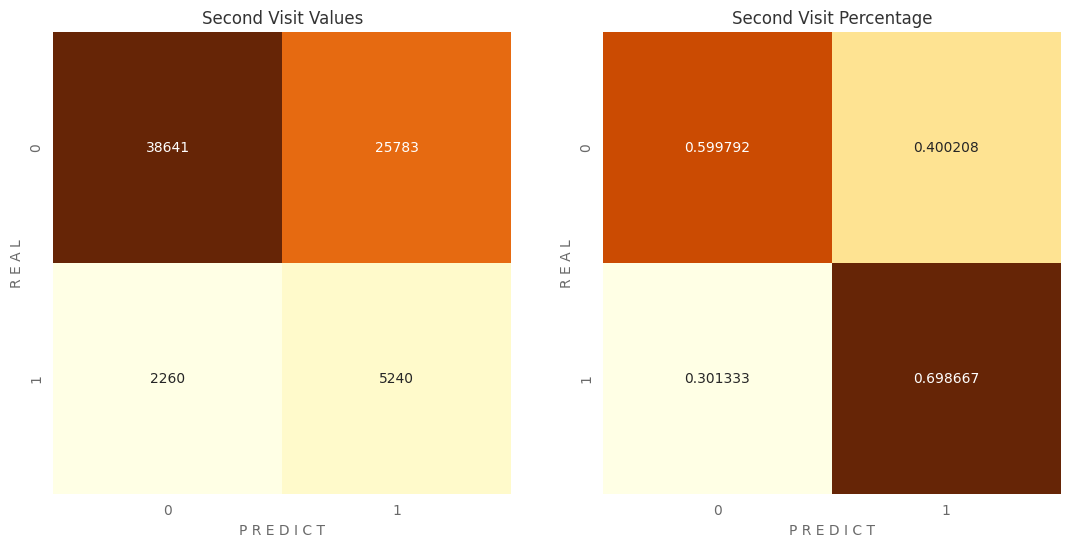

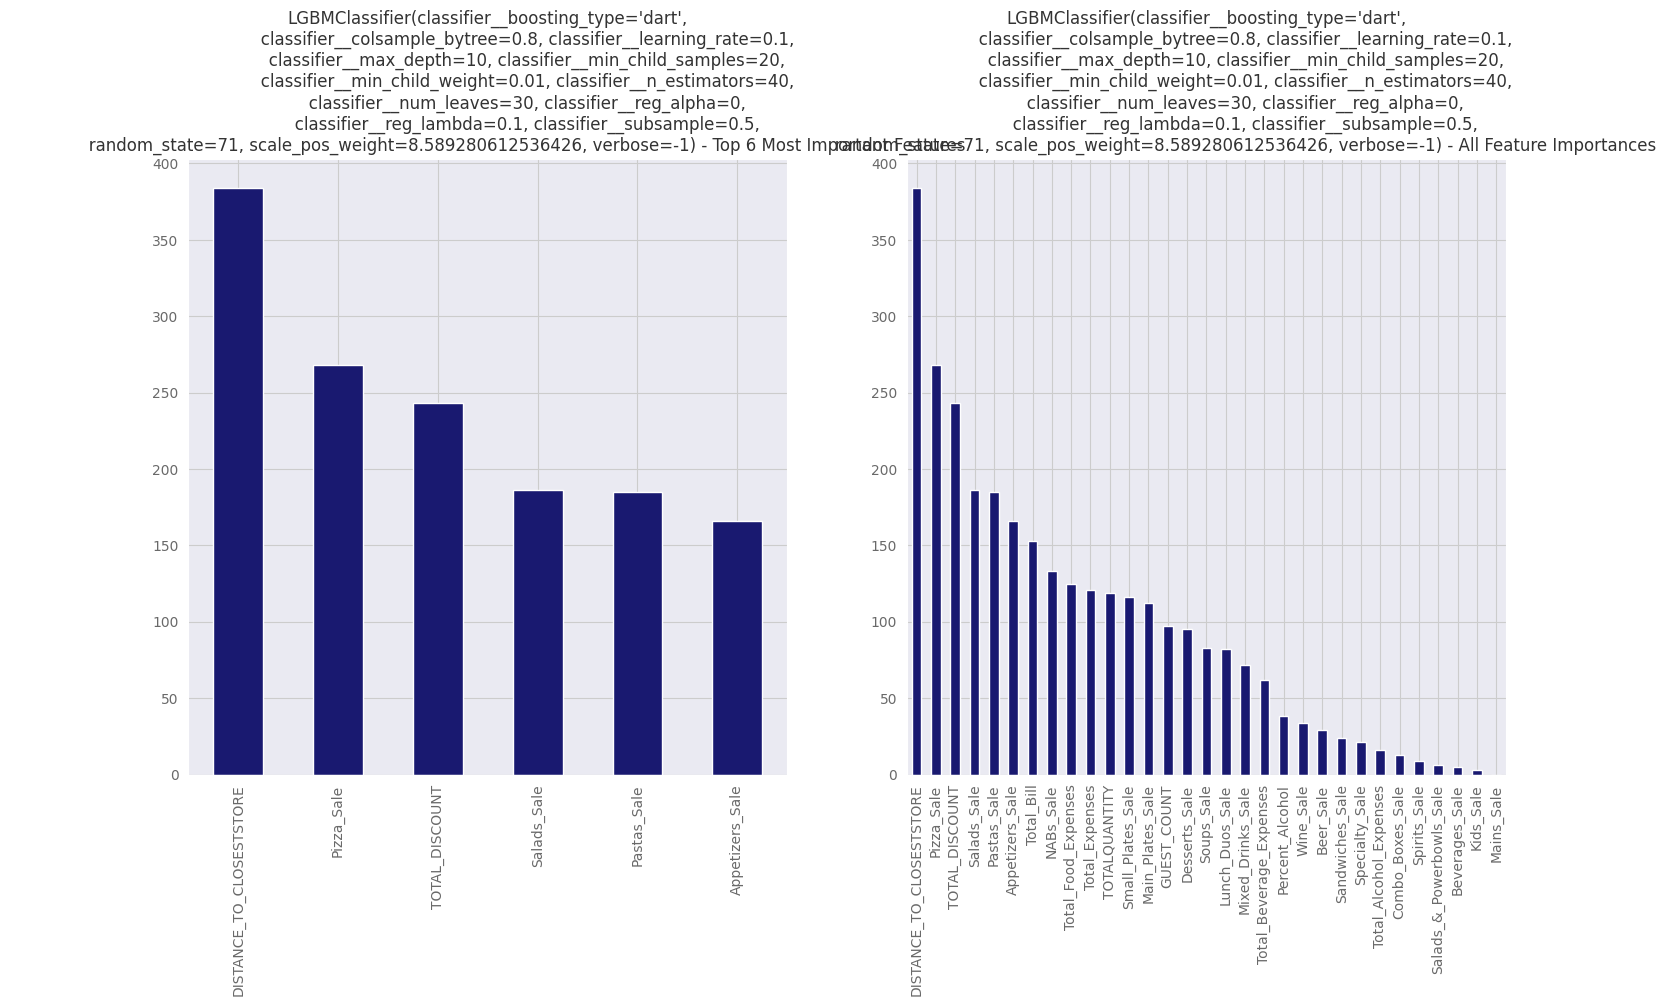

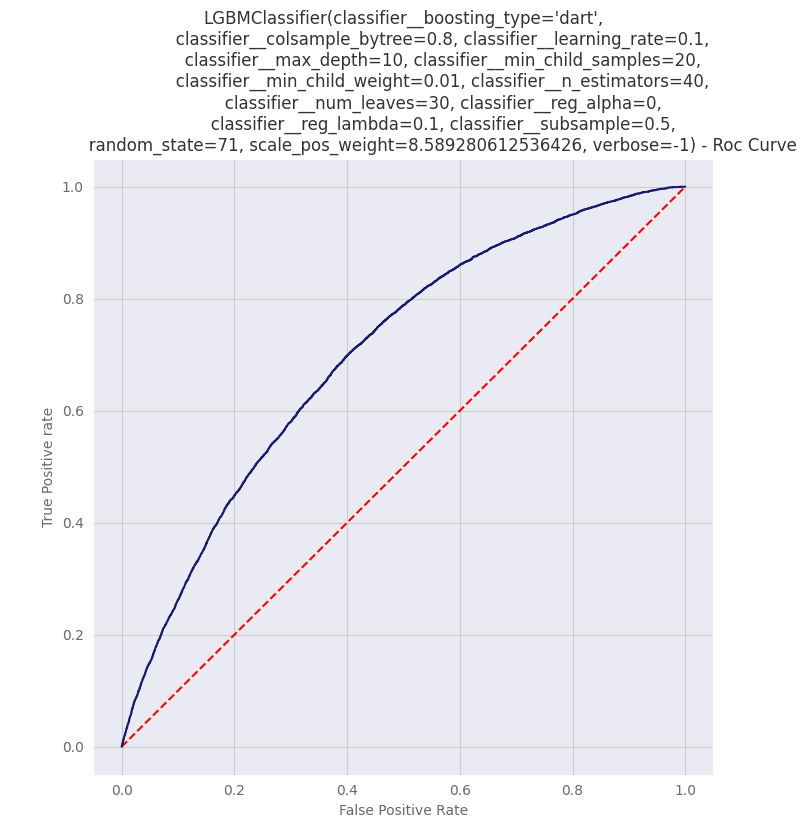

AUC Score (ROC): 0.7012139616705989

Stored Results
Complete Pipeline Function Apllied 



In [ ]:
# Optimizing best model LGBM

# Using best parameters to fit again with best LGBM Model

best_lgbm = bayes_search.best_estimator_

# Rodando o modelo best lgbm

pipeline (best_lgbm, x_train, x_test, y_train, y_test)

## Selecting the Best Model

In [ ]:
# Show comparative results

dic_models_cv = {'Model': model_name, 'Precision': precision, 'Accuracy': accuracy,
                 'Recall': recall, 'ROC AUC Score': roc_curve_sco, 'F1 Score': f1_sco}

df_comparative_cv = pd.DataFrame(dic_models_cv)
df_comparative_cv


,Model,Precision,Accuracy,Recall,ROC AUC Score,F1 Score
0,DecisionTreeClassifier,14.321024,56.256604,64.120000,63.434182,23.412853
1,RandomForestClassifier,19.706242,87.507647,6.440000,61.669381,9.707567
2,XGBClassifier,21.666667,89.525054,0.173333,69.924838,0.343915
3,LGBMClassifier,16.890694,61.010233,69.866667,70.121396,27.204527
4,LGBMClassifier,16.890694,61.010233,69.866667,70.121396,27.204527


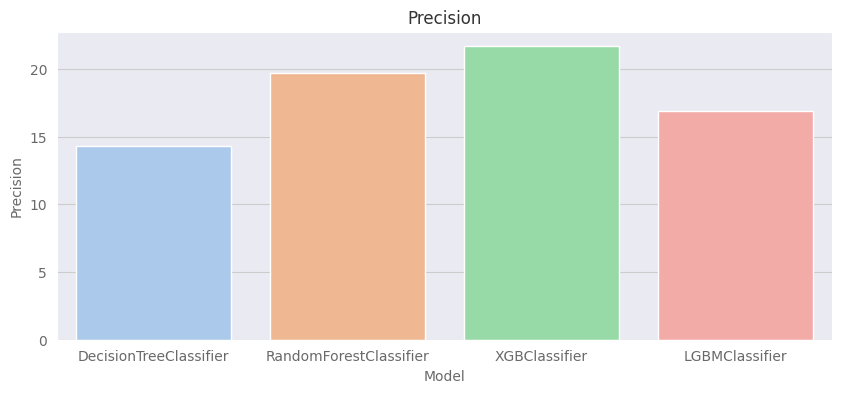

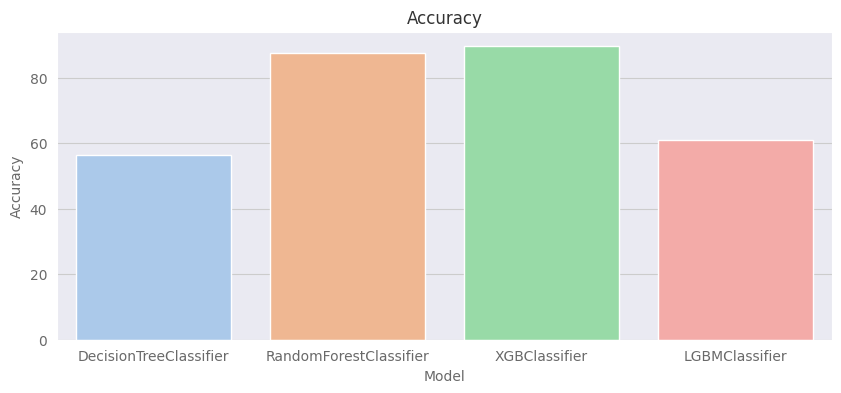

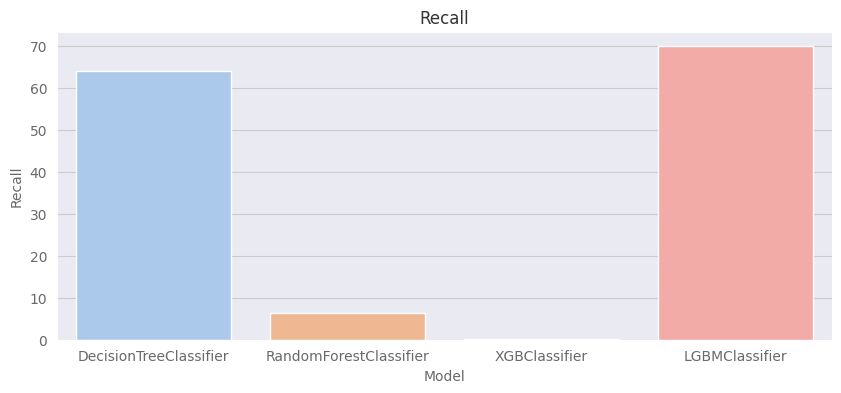

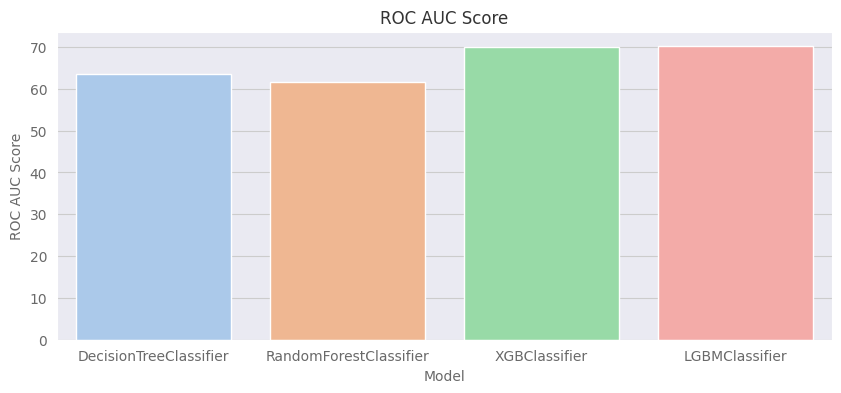

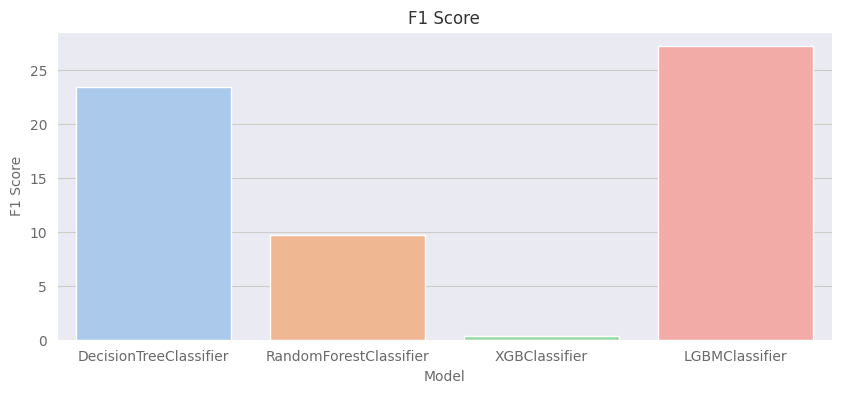

In [ ]:
# Plot comparative charts of models metrics

for col in df_comparative_cv.columns[1:]:
  plt.figure(figsize=(10,4))
  sns.barplot(data=df_comparative_cv, x= df_comparative_cv.Model, y=col, palette= 'pastel')
  plt.title(col)
  plt.tick_params(axis= 'x', labelrotation= 0)
  plt.show()

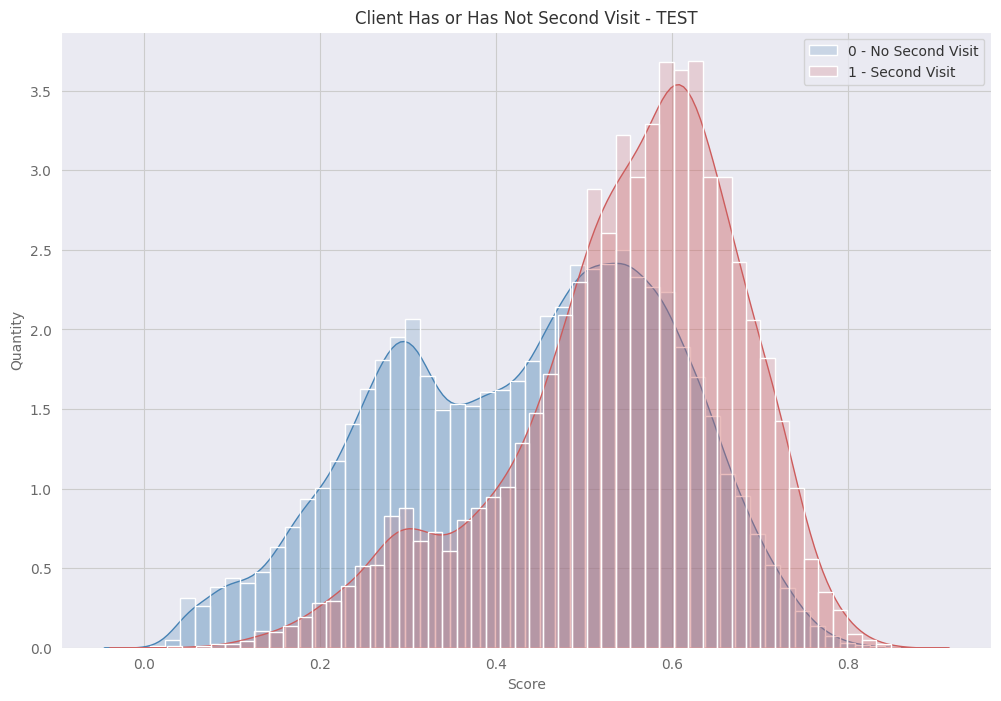

In [ ]:
model = best_lgbm.fit(x_train, y_train)

# Test Prediction
y_test_pred = model.predict(x_test)
y_test_pred_prob = model.predict_proba(x_test)[:,1]

df_lgbm = pd. DataFrame({'target': y_test, 'predict': y_test_pred_prob})

no_second_visit = df_lgbm.loc[df_lgbm['target'] == 0]
second_visit = df_lgbm.loc[df_lgbm['target'] == 1]

fig, ax = plt.subplots(figsize= (12, 8))

sns.kdeplot(no_second_visit.predict, ax= ax, fill= True, color= 'steelblue')
sns.histplot(no_second_visit.predict, ax= ax, bins= 50, stat= 'density', color= 'steelblue', alpha= 0.2, label= '0 - No Second Visit', cbar_kws= {'linewidth': 0.1})

sns.kdeplot(second_visit.predict, ax= ax, fill= True, color= 'indianred')
sns.histplot(second_visit.predict, ax= ax, bins= 50, stat= 'density', color= 'indianred', alpha= 0.2, label= '1 - Second Visit', cbar_kws= {'linewidth': 0.1})

ax.set_title('Client Has or Has Not Second Visit - TEST')
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.legend()

plt.show()

#### Which Model has Better Performance?

  * LGBM was chosen due to this better metrics and fast implementation.

  * It is a model that uses a sequence of decision trees, each new tree tries to correct errors and improve the previous ones, gradually improving the model's accuracy.

  * The model increases its effectiveness by using an optimization based on Gradient Boosting, where machine learning takes place iteratively by training new models to minimize the errors of the previous model. Each subsequent model is then trained to correct the deficiencies of the previous one and thus gradually improve the classification. At the end of the iteration process, the models are powerfully combined based on their effectiveness in minimizing previous errors and choose a final prediction.

  * LGBM is a fast process that uses relatively few computational resources, being very efficient for models in production, when a quick response from the model is required.

  * It hits 70% of true positive cases and classifies 30% of false negative cases.

  * At the same time, it gets 60% of true negative cases right and 40% of false positive cases wrong.

  * As we can see it's not the best model performance ever, but has balanced metrics and it probably means that the model is reliable.




### SHAP Explainer

In [ ]:
# Using shap explainer to better understand feature importances and model explicability

explainer = shap.TreeExplainer(best_lgbm)

shap_values = explainer(x_train)

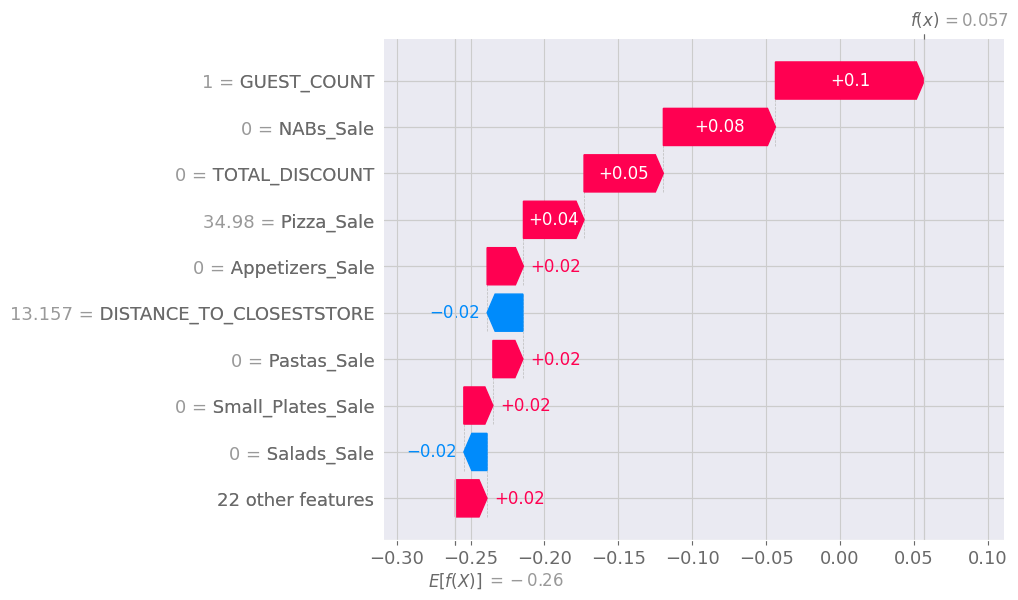

In [ ]:
shap.plots.waterfall(shap_values[0])

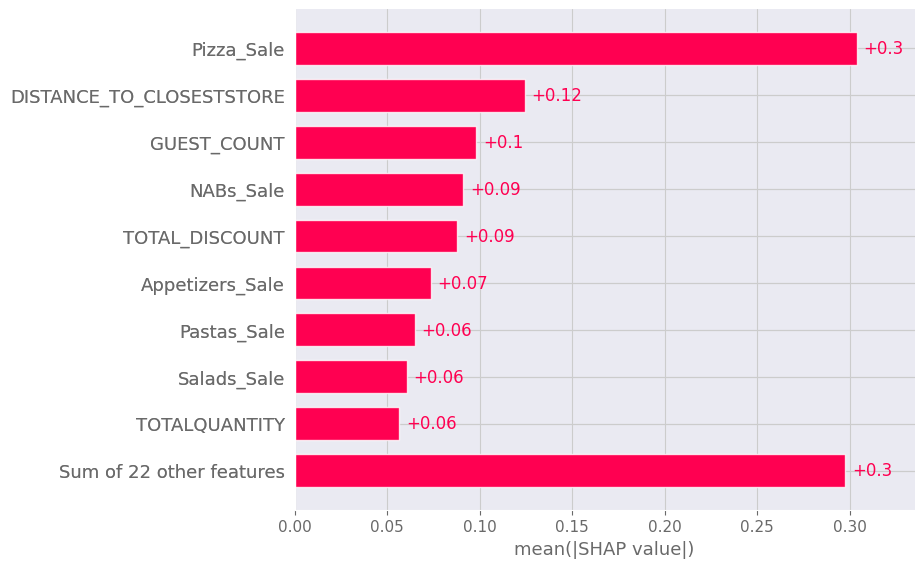

In [ ]:
shap.plots.bar(shap_values)

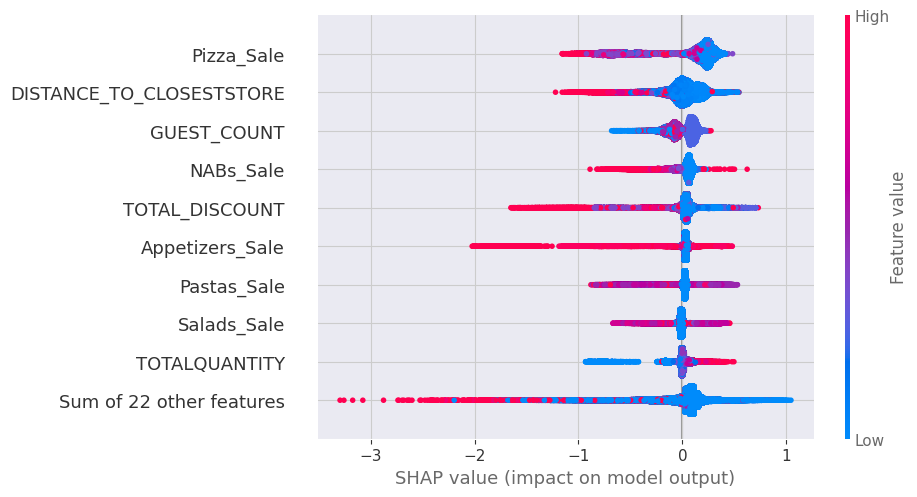

In [ ]:
shap.plots.beeswarm(shap_values)

####Shap Values Analysis

  * From the above charts, we can see that there are some features that contributes more to the prediction power of the model than others. Red colors indicates a bigger contribution and blue colors indicates the features that contributes less.

  * Pizza_Sale can explain alone the same prediction power than the sum of 22 different features.

  * Distance to Closest Store and Guest Count are also good prediction features as we can see in the bar chart above.

  * The beeswarm chart also shows a clear view about the importance of these three main features. These chart displays how much each feature can discriminate between the classes in higher or lower probability scores. For instance, Pizza Sale can discriminate well in lower scores (blue dots on the right) while it is not so good at discrimiminate higher score values (mixed red and blue dots on the left side of the chart).

  * With this acquired knowledge, it's possible to build another model using only the most important predictor variables, which can lead to a better classification performance and less computational resources.

## Model LGBM After Optimization

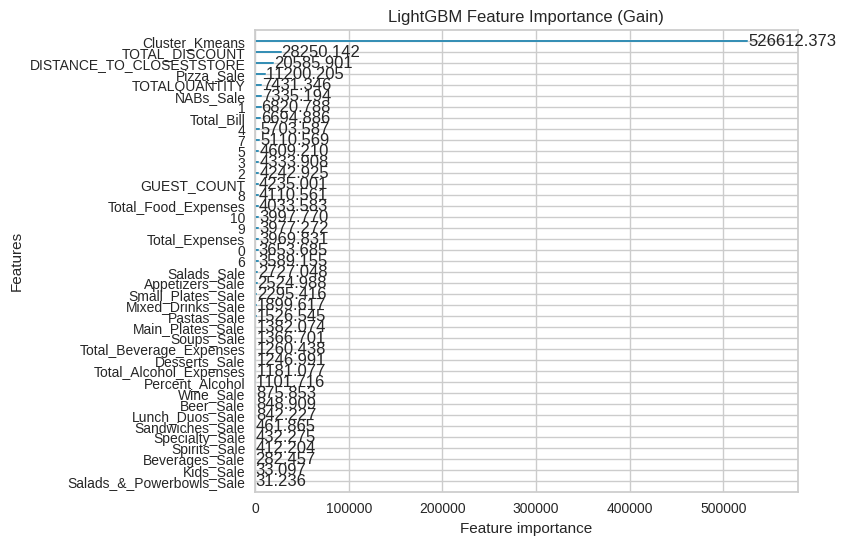

In [ ]:
# Plot feature importance using Gain

lgb.plot_importance(model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()


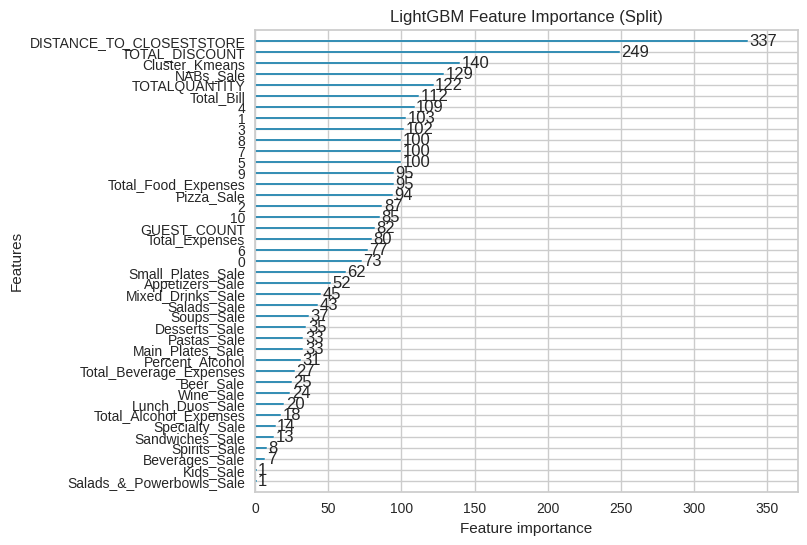

In [ ]:
# Plot feature importance using Split

lgb.plot_importance(model, importance_type="split", figsize=(7,6), title="LightGBM Feature Importance (Split)")
plt.show()


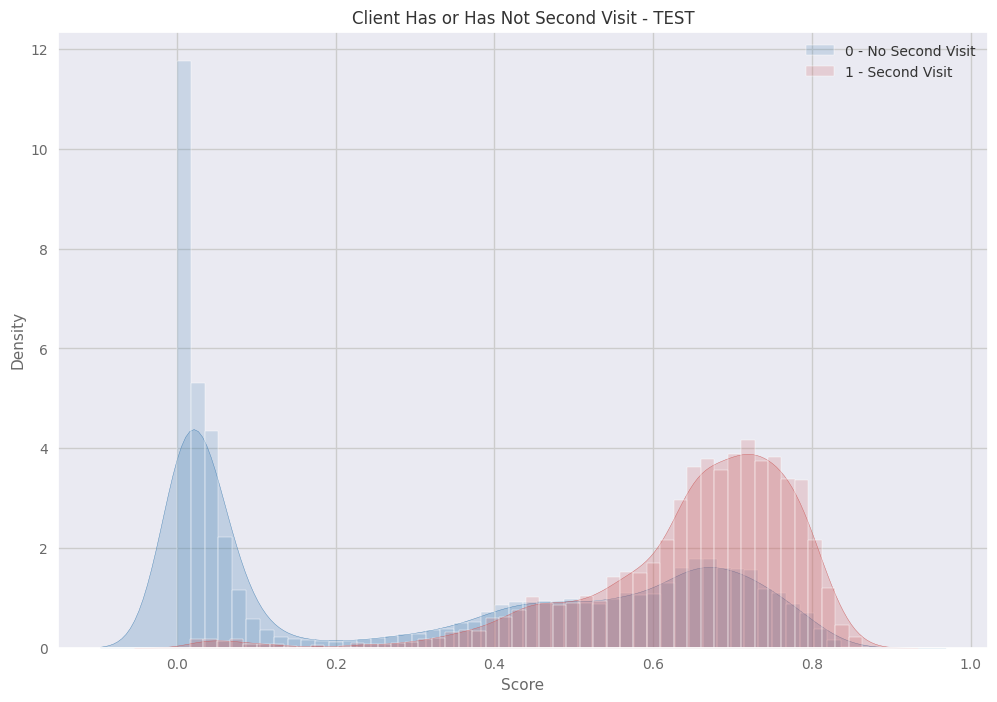

In [ ]:
model = best_lgbm.fit(x_train, y_train)

# Test Prediction
y_test_pred = model.predict(x_test)
y_test_pred_prob = model.predict_proba(x_test)[:,1]

df_lgbm = pd. DataFrame({'target': y_test, 'predict': y_test_pred_prob})

no_second_visit = df_lgbm.loc[df_lgbm['target'] == 0]
second_visit = df_lgbm.loc[df_lgbm['target'] == 1]

fig, ax = plt.subplots(figsize= (12, 8))

sns.kdeplot(no_second_visit.predict, ax= ax, fill= True, color= 'steelblue')
sns.histplot(no_second_visit.predict, ax= ax, bins= 50, stat= 'density', color= 'steelblue', alpha= 0.2, label= '0 - No Second Visit', cbar_kws= {'linewidth': 0.1})

sns.kdeplot(second_visit.predict, ax= ax, fill= True, color= 'indianred')
sns.histplot(second_visit.predict, ax= ax, bins= 50, stat= 'density', color= 'indianred', alpha= 0.2, label= '1 - Second Visit', cbar_kws= {'linewidth': 0.1})

ax.set_title('Client Has or Has Not Second Visit - TEST')
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.legend()

plt.show()

In [ ]:
df_lgbm[df_lgbm['target'] == 0].max()

target     0.000000
predict    0.871583
dtype: float64